In [2]:
import glob
import numpy as np
import shutil
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
path = "/Users/nduginets/PycharmProjects/master-diploma/tmp_data/classifiers"

In [4]:
def get_vals(exec_type):
    items = glob.glob(os.path.join(path, exec_type + '*'))
    items = list(map(lambda x: os.path.join(x, 'test_metrics.json'), items))
    return items

In [5]:
classifier = get_vals("classifier_")
pix2pix20 = get_vals("pix_2pix_classifier_20")
pix2pix50 = get_vals("pix_2pix_classifier_50")
pix2pix80 = get_vals("pix_2pix_classifier_80")

pix2pix120 = get_vals("pix_2pix_classifier_120")
pix2pix150 = get_vals("pix_2pix_classifier_150")
pix2pix180 = get_vals("pix_2pix_classifier_180")

datasets = [
    ("classifier", classifier),
    ("pix2pix20", pix2pix20),
    ("pix2pix50", pix2pix50),
    ("pix2pix80", pix2pix80),
    ("pix2pix120", pix2pix120),
    ("pix2pix150", pix2pix150),
    ("pix2pix180", pix2pix180),
]

In [6]:
classifier = get_vals("weighted_classifier_")
pix2pix20 = get_vals("weighted_pix_2pix_classifier_20")
pix2pix50 = get_vals("weighted_pix_2pix_classifier_50")
pix2pix80 = get_vals("weighted_pix_2pix_classifier_80")

pix2pix120 = get_vals("weighted_pix_2pix_classifier_120")
pix2pix150 = get_vals("weighted_pix_2pix_classifier_150")
pix2pix180 = get_vals("weighted_pix_2pix_classifier_180")

weighted_datasets = [
    ("weighted_classifier", classifier),
    ("weighted_pix2pix20", pix2pix20),
    ("weighted_pix2pix50", pix2pix50),
    ("weighted_pix2pix80", pix2pix80),
    ("weighted_pix2pix120", pix2pix120),
    ("weighted_pix2pix150", pix2pix150),
    ("weighted_pix2pix180", pix2pix180),
]

In [7]:
def to_map(d):
    dd = [json.loads("\n".join(open(i, "r").readlines())) for i in d]
    return [{int(k):v for k,v in d.items() } for d in dd]

In [8]:
data = [
    (n, to_map(d)) for n, d in datasets
]

weighted_data = [
    (n, to_map(d)) for n, d in weighted_datasets
]


In [17]:
def draw_metric(metric_name, datas):
    x = [i for i in range(100)]
    items = {}
    for name, ys in datas:
        y_values = []
        for idx in range(100):
            averages = []
            for f_idx in range(10):
                #print(name, idx, f_idx)
                #print(ys)
                averages.append(ys[f_idx][idx][metric_name])
            y_values.append(np.mean(np.array(averages)))
        items[name] = (x, y_values)

    plt.figure(figsize=(30, 10))
    plt.title(metric_name)
    for n, (x, y) in items.items():
        plt.plot(x, y, label=n)
    plt.legend()
    plt.show()
    plt.clf()

def draw_metric_subplots(metric_name, datas, subplot):
    x = [i for i in range(100)]
    items = {}
    for name, ys in datas:
        y_values = []
        for idx in range(100):
            averages = []
            for f_idx in range(10):
                #print(name, idx, f_idx)
                #print(ys)
                averages.append(ys[f_idx][idx][metric_name])
            y_values.append(np.mean(np.array(averages)))
        items[name] = (x, y_values)

    subplot.set_title(metric_name)
    for n, (x, y) in items.items():
        subplot.plot(x, y, label=n)
    # subplot.legend()

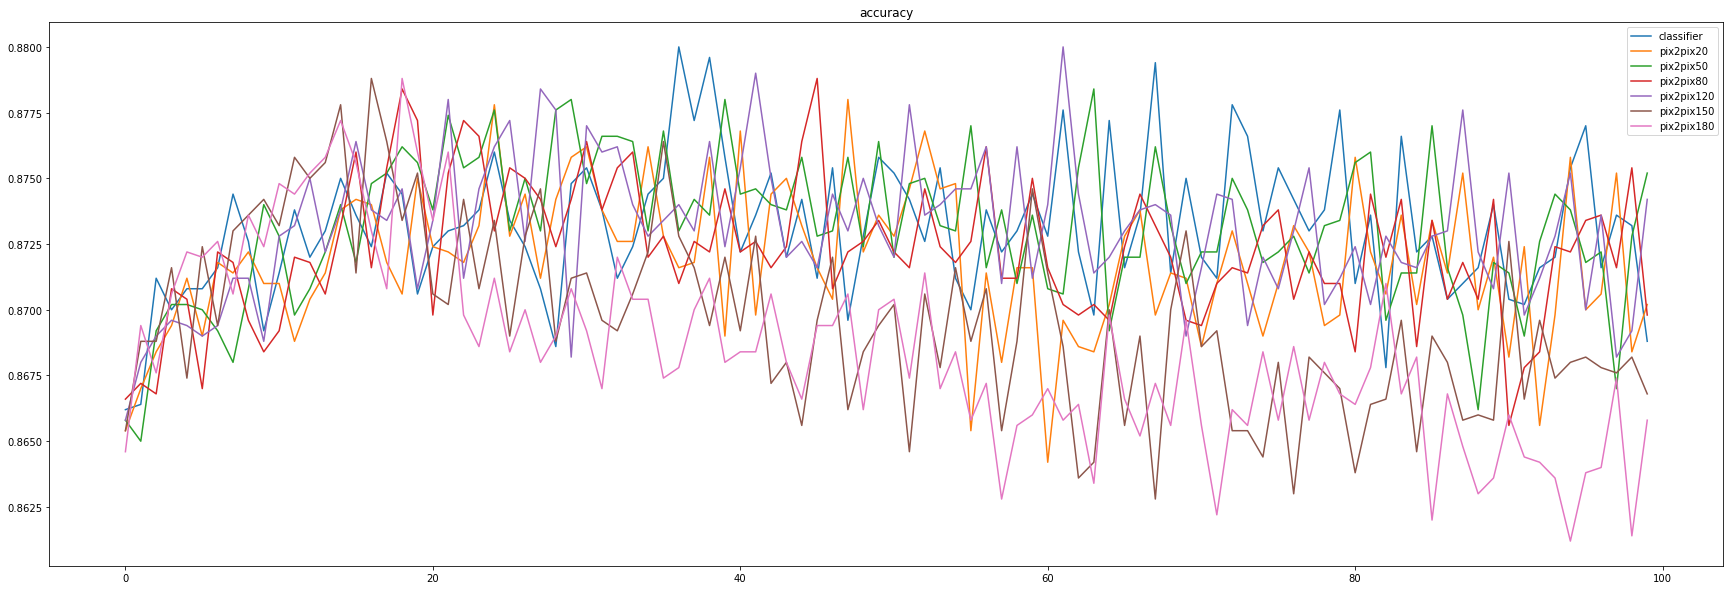

<Figure size 432x288 with 0 Axes>

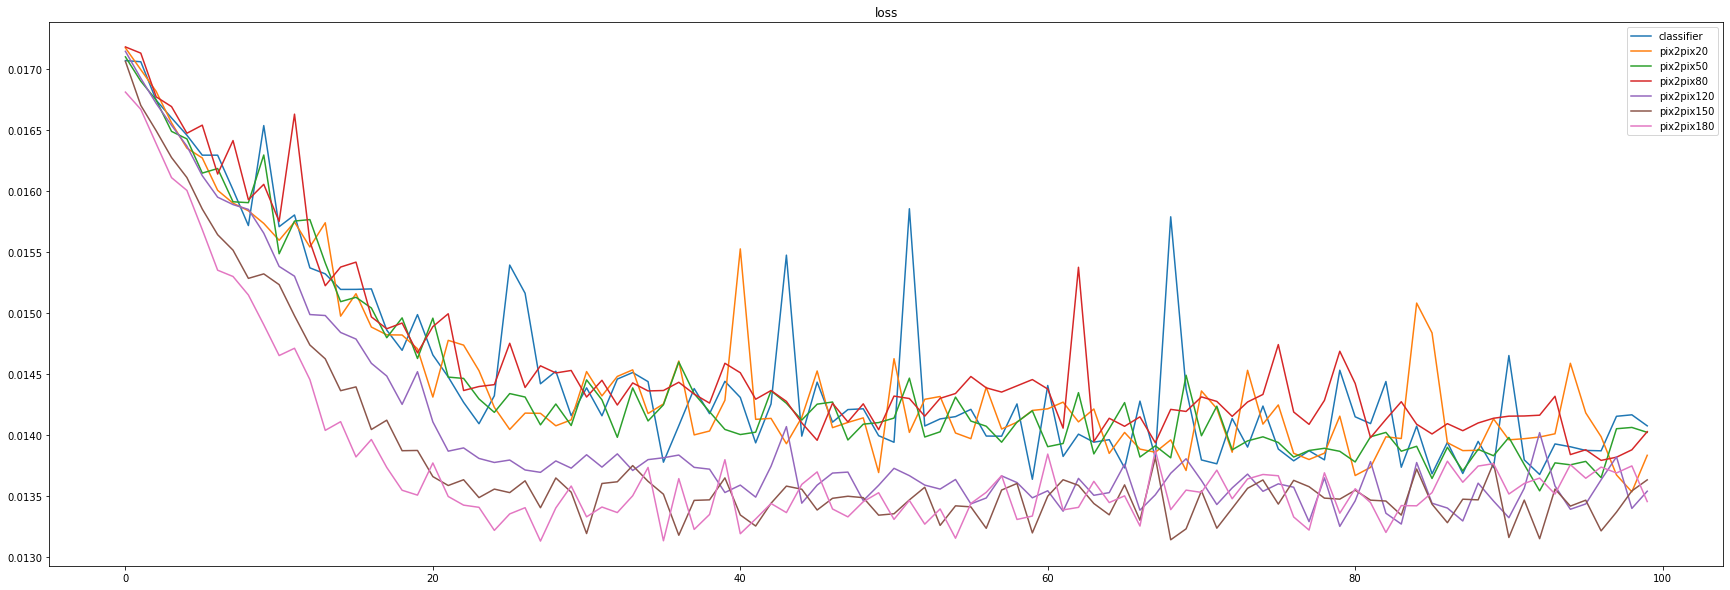

<Figure size 432x288 with 0 Axes>

In [10]:
draw_metric("accuracy", data)
draw_metric("loss", data)

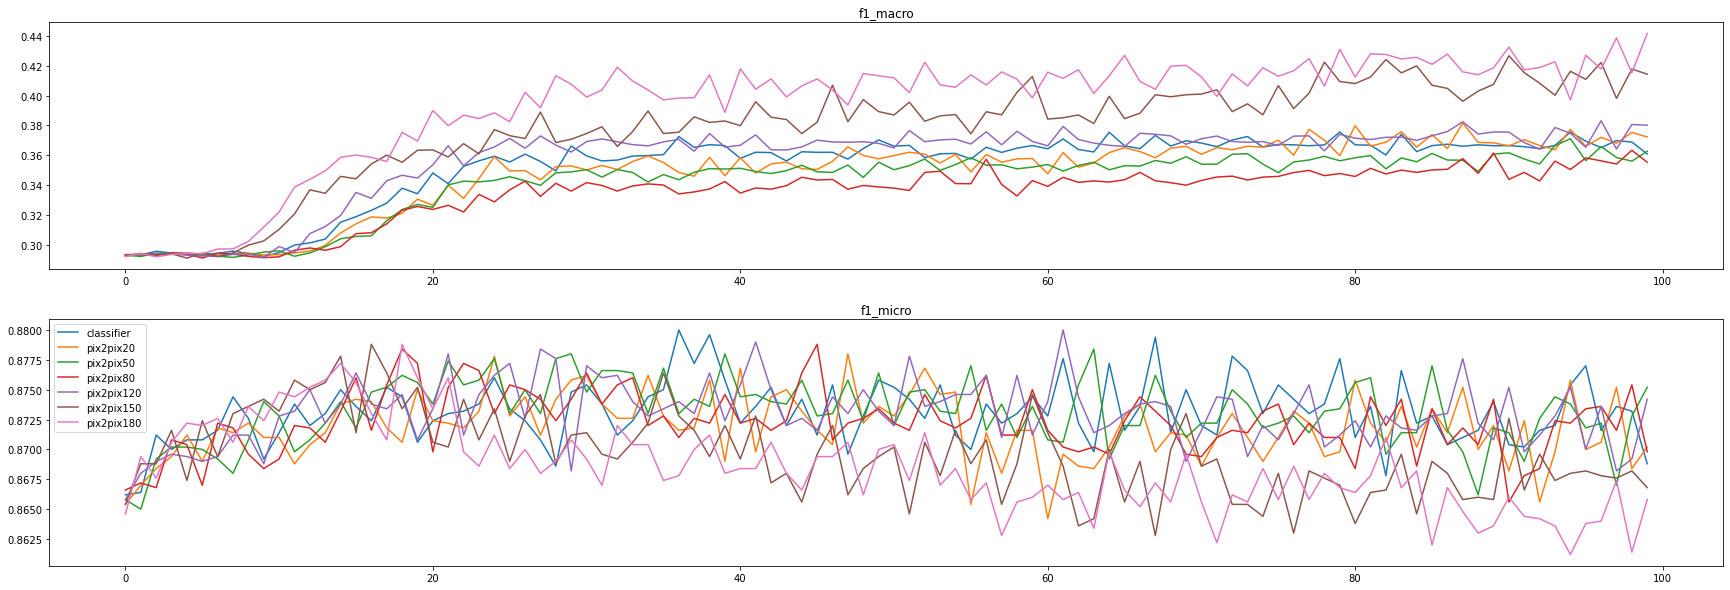

<Figure size 432x288 with 0 Axes>

In [18]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(30, 10))

draw_metric_subplots("f1_macro", data, ax1)
draw_metric_subplots("f1_micro", data, ax2)
plt.legend()
plt.show()
# plt.savefig("f1_macro_micro_isic_val.png", bbox_inches='tight')
plt.clf()

In [12]:
def draw_metric_by_deceases(deceases, metric_name, datas):
    x = [i for i in range(100)]
    items = {}
    for name, ys in datas:
        y_values = []
        for idx in range(100):
            averages = []
            for f_idx in range(10):
                #print(name, idx, f_idx)
                #print(ys)
                averages.append(ys[f_idx][idx][deceases][metric_name])
            y_values.append(np.mean(np.array(averages)))
        items[name] = (x, y_values)

    plt.figure(figsize=(30, 10))
    plt.title(deceases + " " + metric_name)
    for n, (x, y) in items.items():
        plt.plot(x, y, label=n)
    plt.legend()
    plt.show()
    plt.clf()

def draw_metric_by_deceases_subplot(deceases, metric_name, datas, axes):
    x = [i for i in range(100)]
    items = {}
    for name, ys in datas:
        y_values = []
        for idx in range(100):
            averages = []
            for f_idx in range(10):
                #print(name, idx, f_idx)
                #print(ys)
                averages.append(ys[f_idx][idx][deceases][metric_name])
            y_values.append(np.mean(np.array(averages)))
        items[name] = (x, y_values)

    axes.set_title(deceases + " " + metric_name)
    for n, (x, y) in items.items():
        axes.plot(x, y, label=n)
    axes.legend(loc = 'lower left')

In [13]:
_, ax_array = plt.subplots(5,1, figsize=(25, 10))

draw_metric_by_deceases_subplot('globules', 'auc', data, ax_array[0])
draw_metric_by_deceases_subplot('milia_like_cyst', 'auc', data, ax_array[1])
draw_metric_by_deceases_subplot('negative_network', 'auc', data, ax_array[2])
draw_metric_by_deceases_subplot('pigment_network', 'auc', data, ax_array[3])
draw_metric_by_deceases_subplot('streaks', 'auc', data, ax_array[4])

plt.savefig("by_deceases_isic_val_auc.png", bbox_inches='tight')
plt.clf()

<Figure size 1800x720 with 0 Axes>

In [14]:
_, ax_array = plt.subplots(5,1, figsize=(25, 10))

draw_metric_by_deceases_subplot('globules', 'f1_binary', data, ax_array[0])
draw_metric_by_deceases_subplot('milia_like_cyst', 'f1_binary', data, ax_array[1])
draw_metric_by_deceases_subplot('negative_network', 'f1_binary', data, ax_array[2])
draw_metric_by_deceases_subplot('pigment_network', 'f1_binary', data, ax_array[3])
draw_metric_by_deceases_subplot('streaks', 'f1_binary', data, ax_array[4])

plt.savefig("by_deceases_isic_val_f1_bin.png", bbox_inches='tight')
plt.clf()


<Figure size 1800x720 with 0 Axes>

# weighted

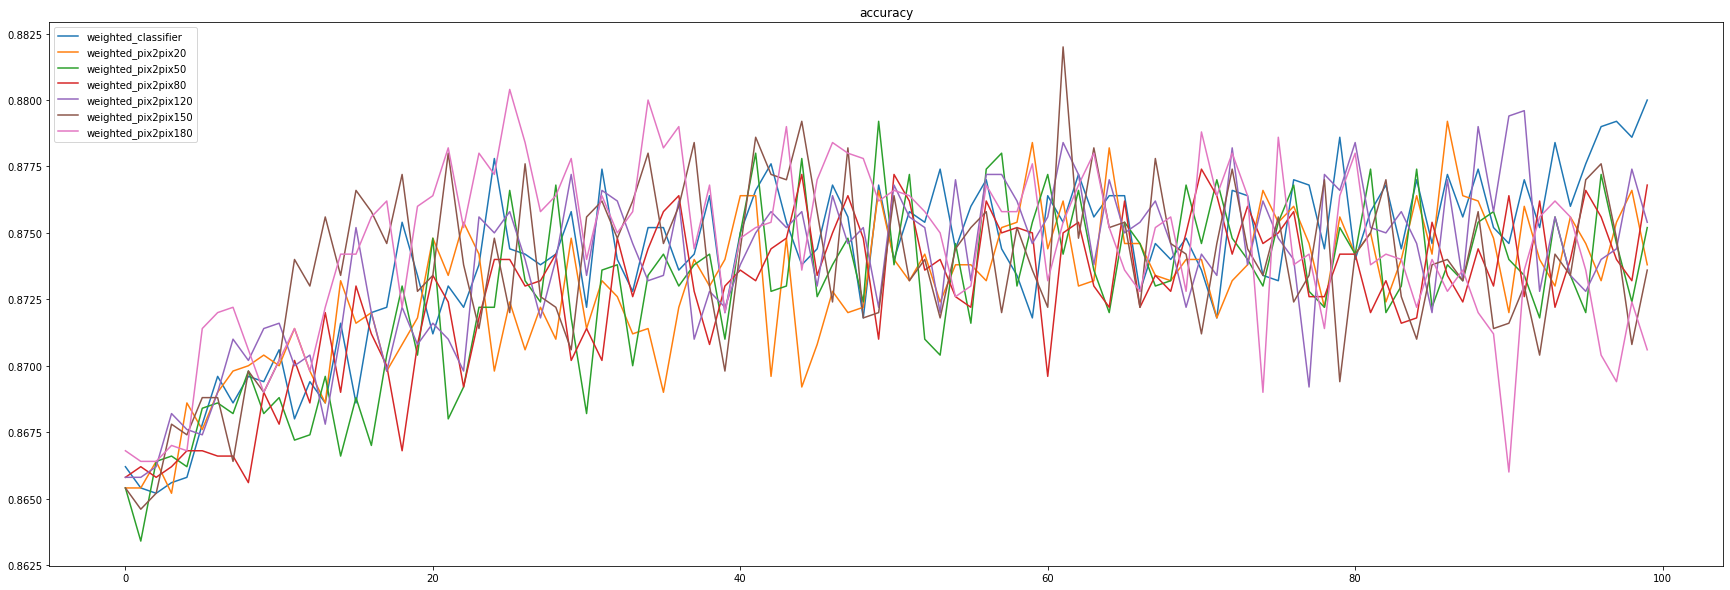

<Figure size 432x288 with 0 Axes>

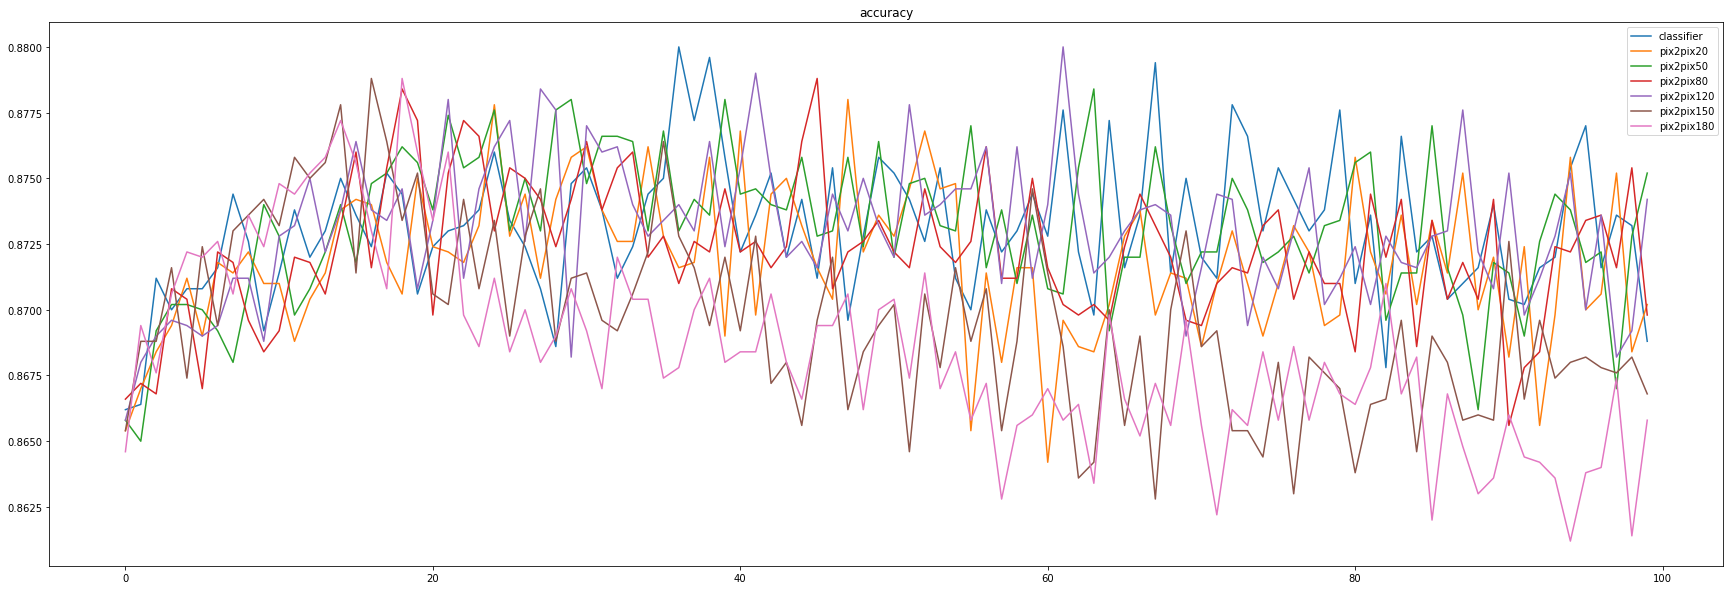

<Figure size 432x288 with 0 Axes>

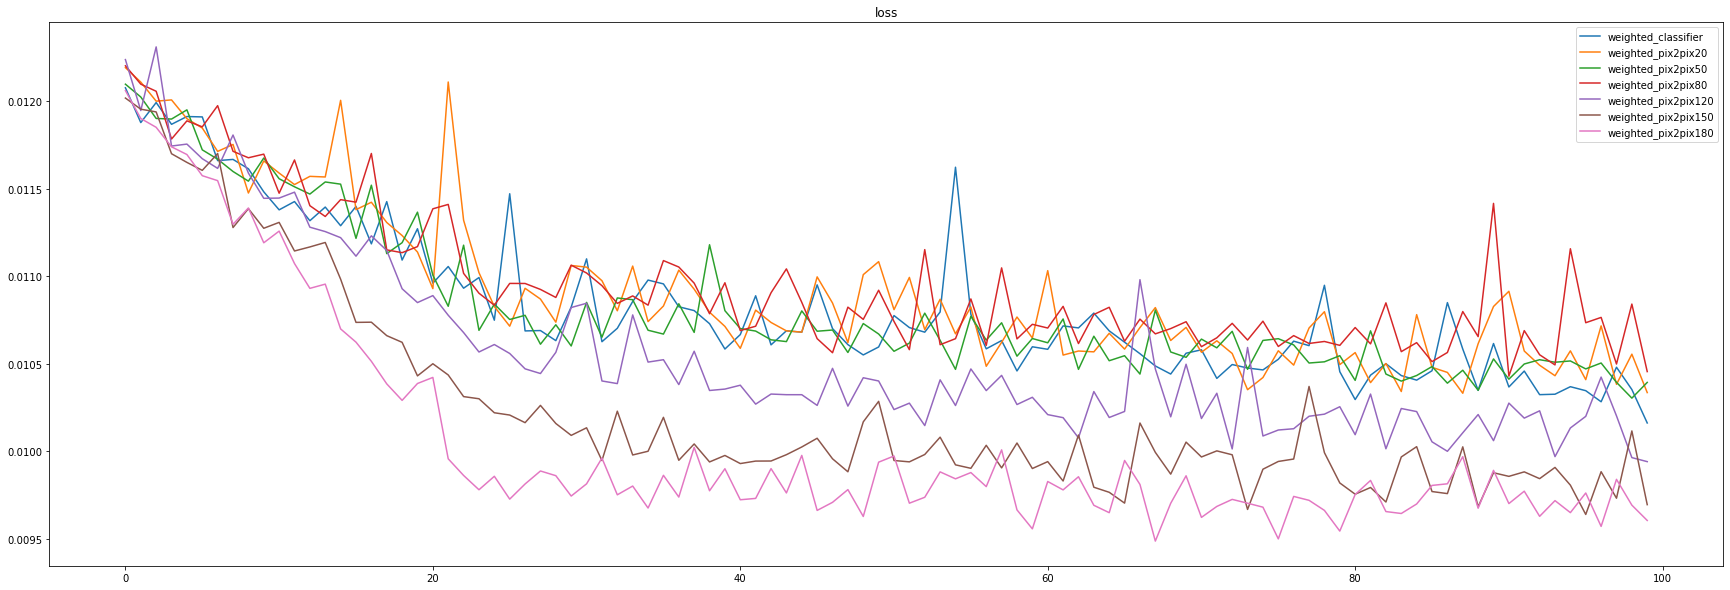

<Figure size 432x288 with 0 Axes>

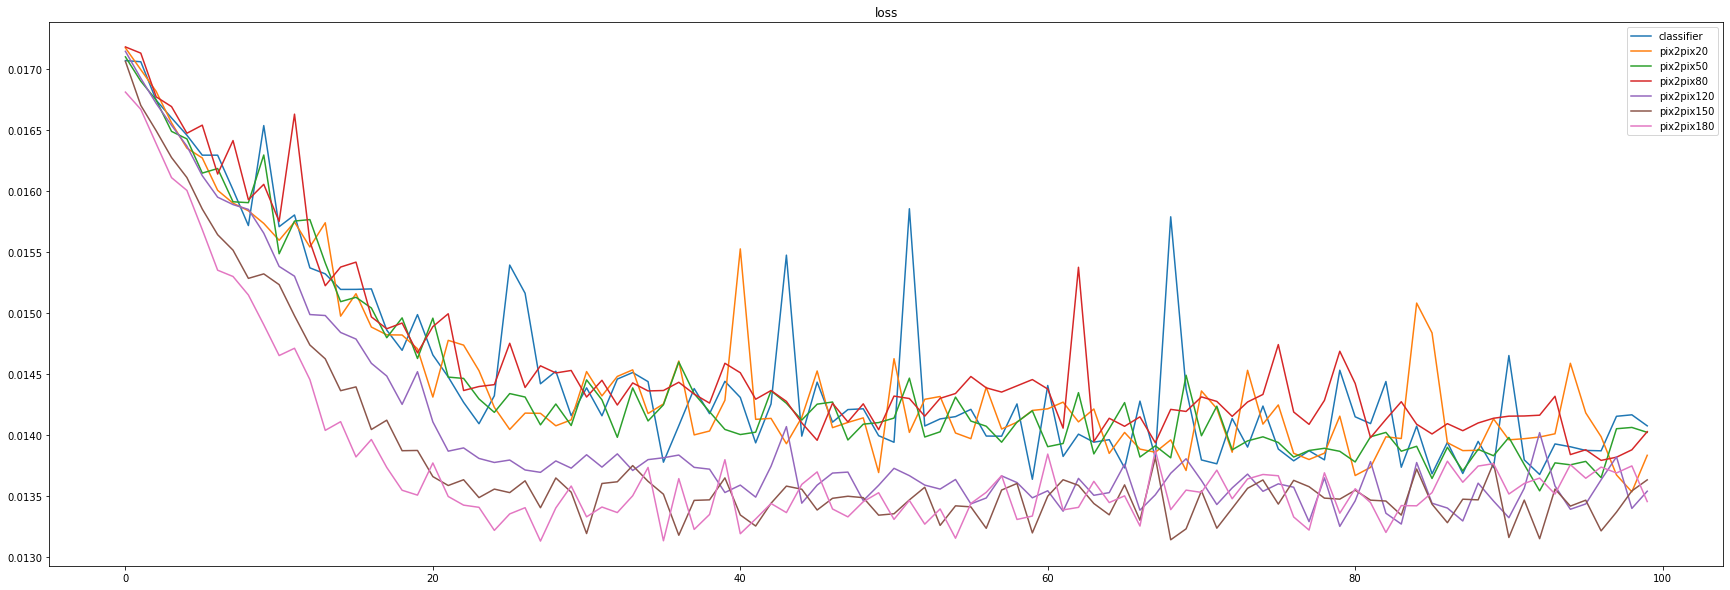

<Figure size 432x288 with 0 Axes>

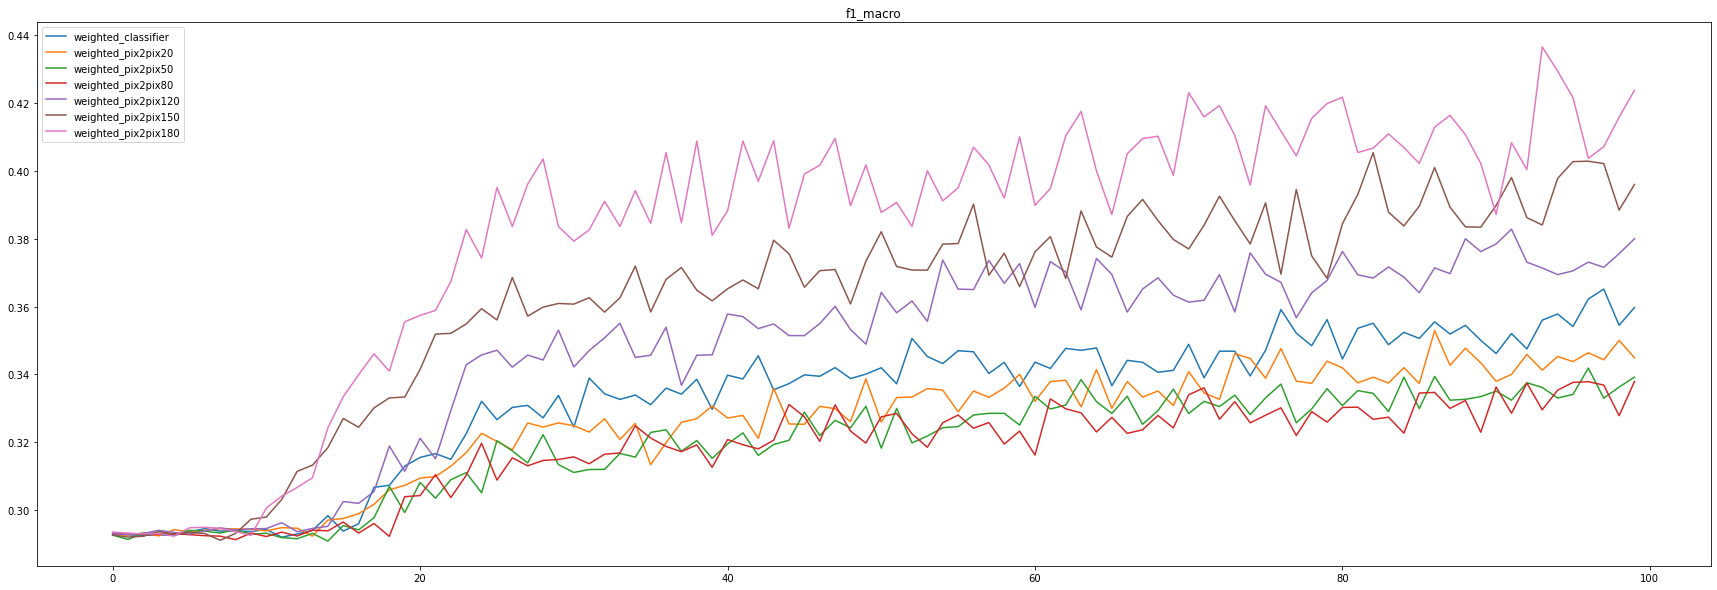

<Figure size 432x288 with 0 Axes>

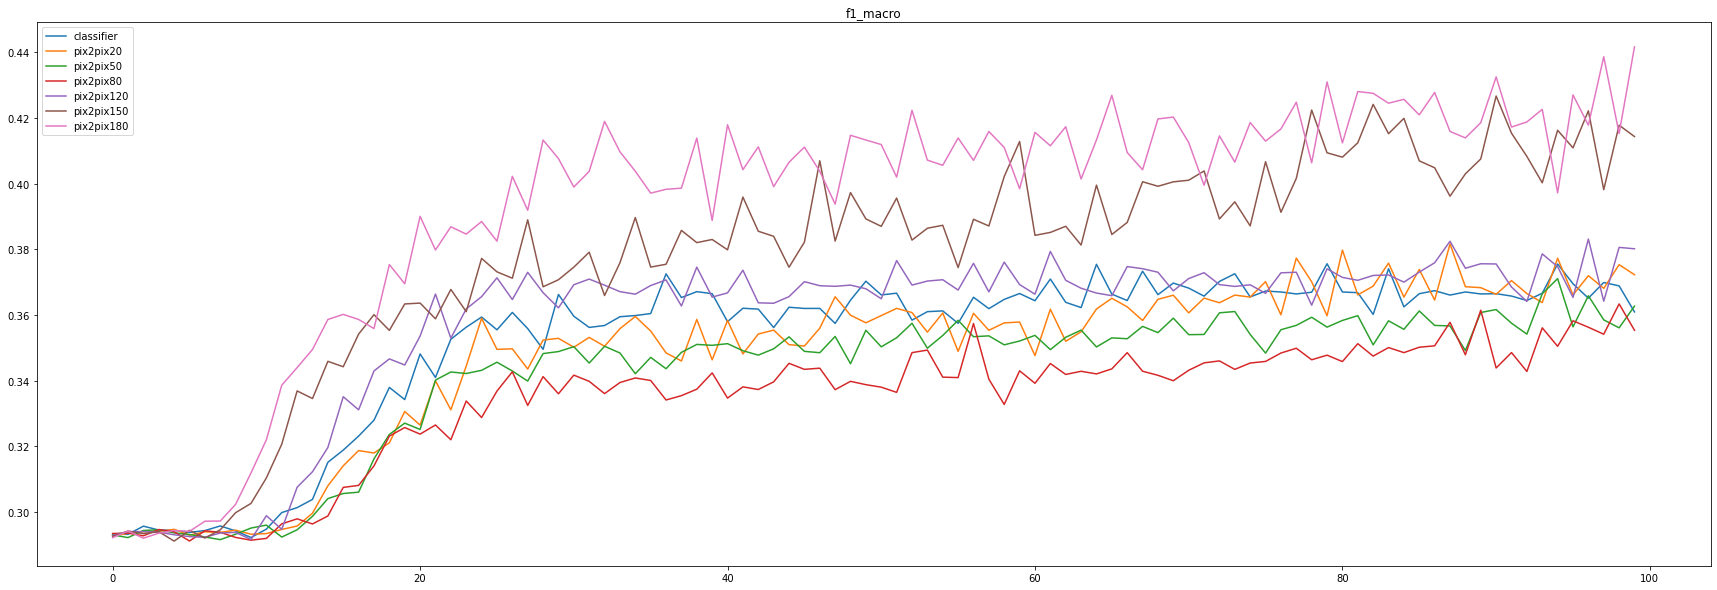

<Figure size 432x288 with 0 Axes>

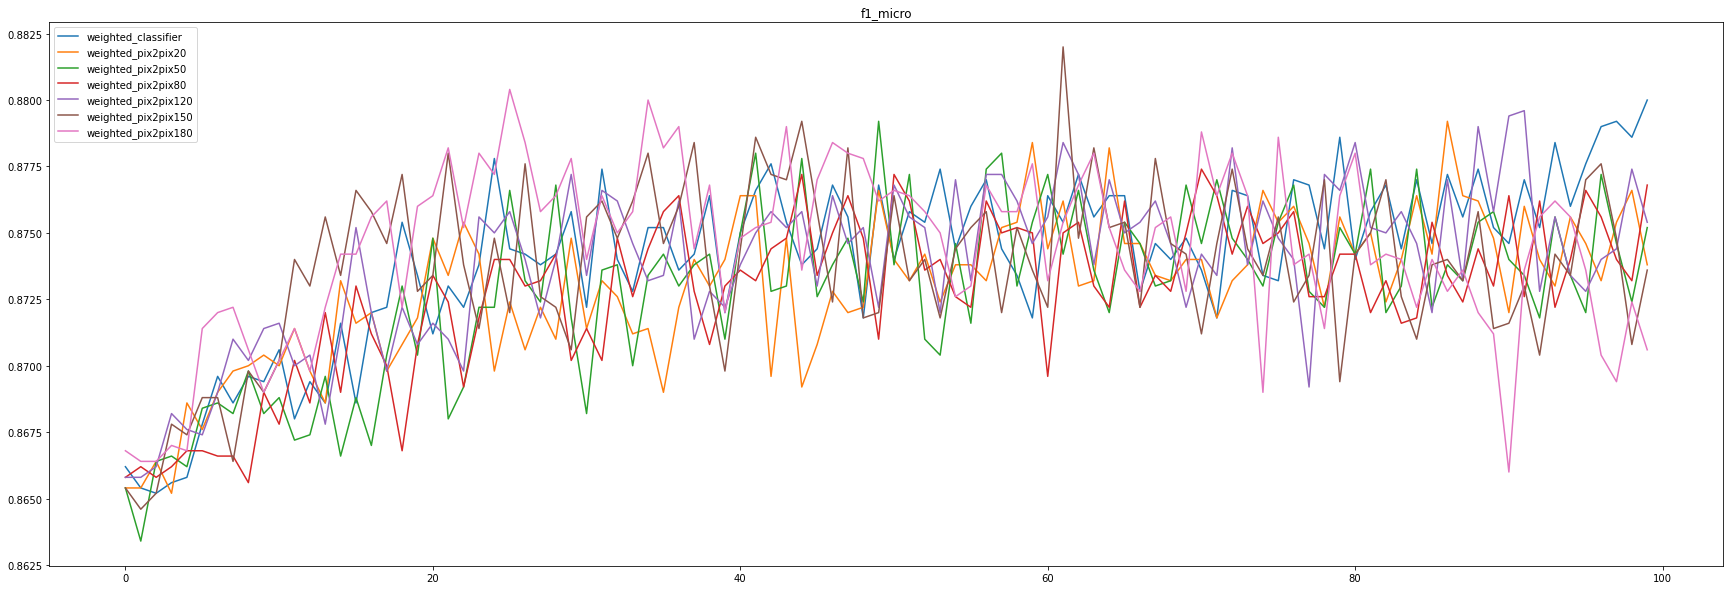

<Figure size 432x288 with 0 Axes>

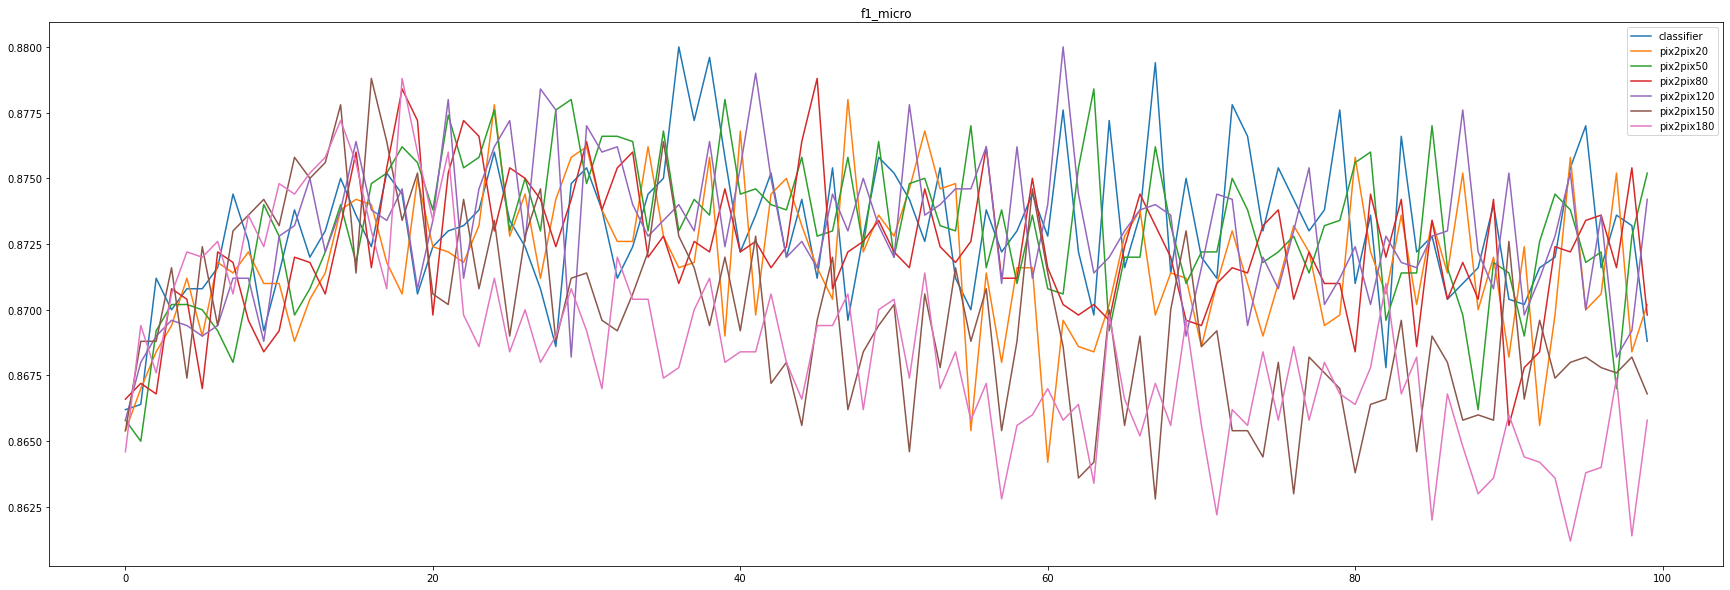

<Figure size 432x288 with 0 Axes>

In [15]:
draw_metric("accuracy", weighted_data)
draw_metric("accuracy", data)

draw_metric("loss", weighted_data)
draw_metric("loss", data)

draw_metric("f1_macro", weighted_data)
draw_metric("f1_macro", data)

draw_metric("f1_micro", weighted_data)
draw_metric("f1_micro", data)

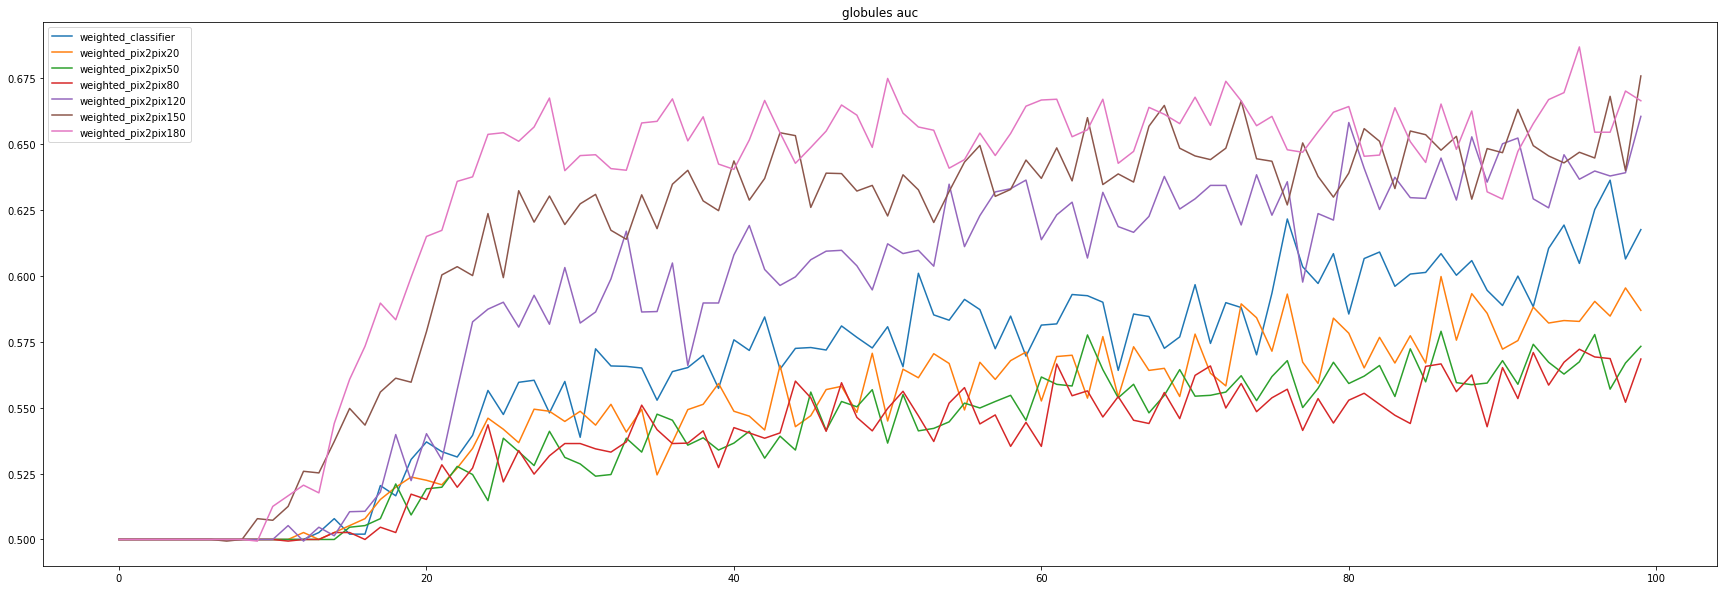

<Figure size 432x288 with 0 Axes>

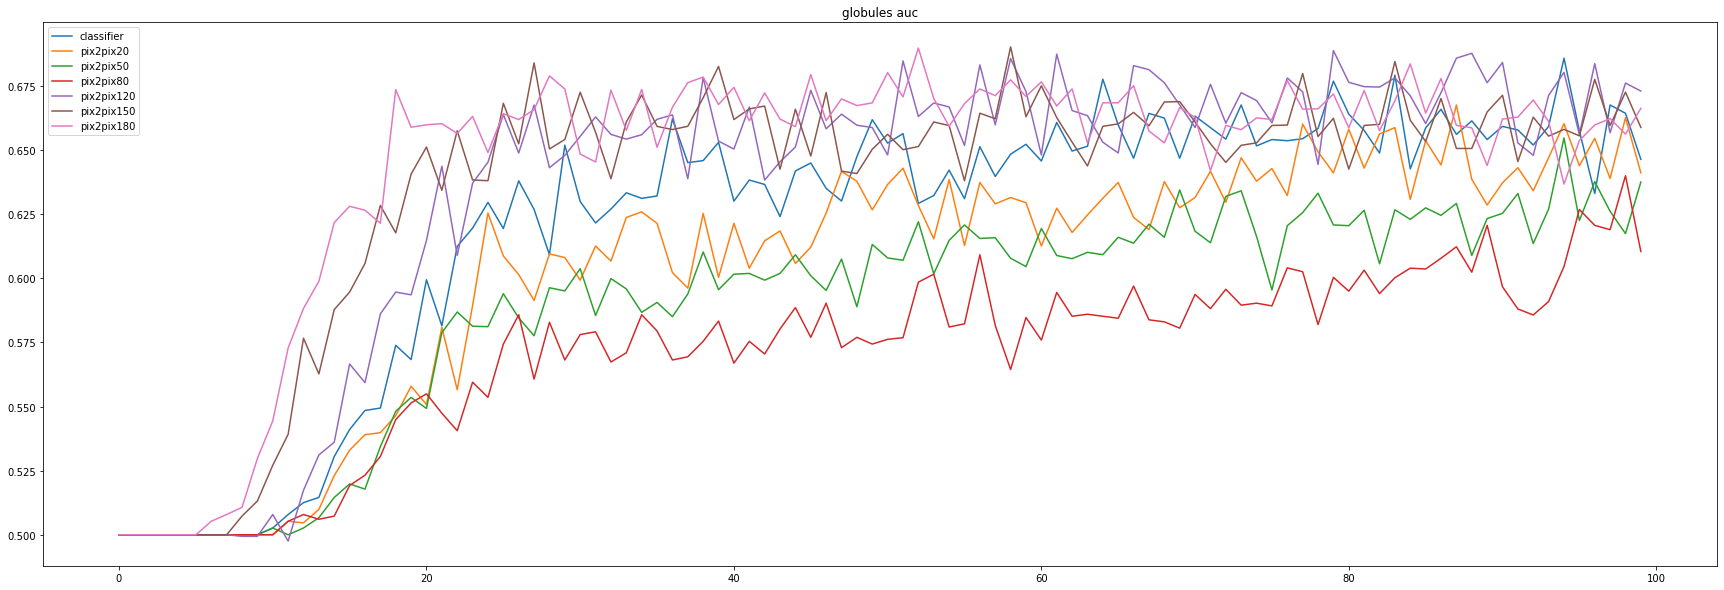

<Figure size 432x288 with 0 Axes>

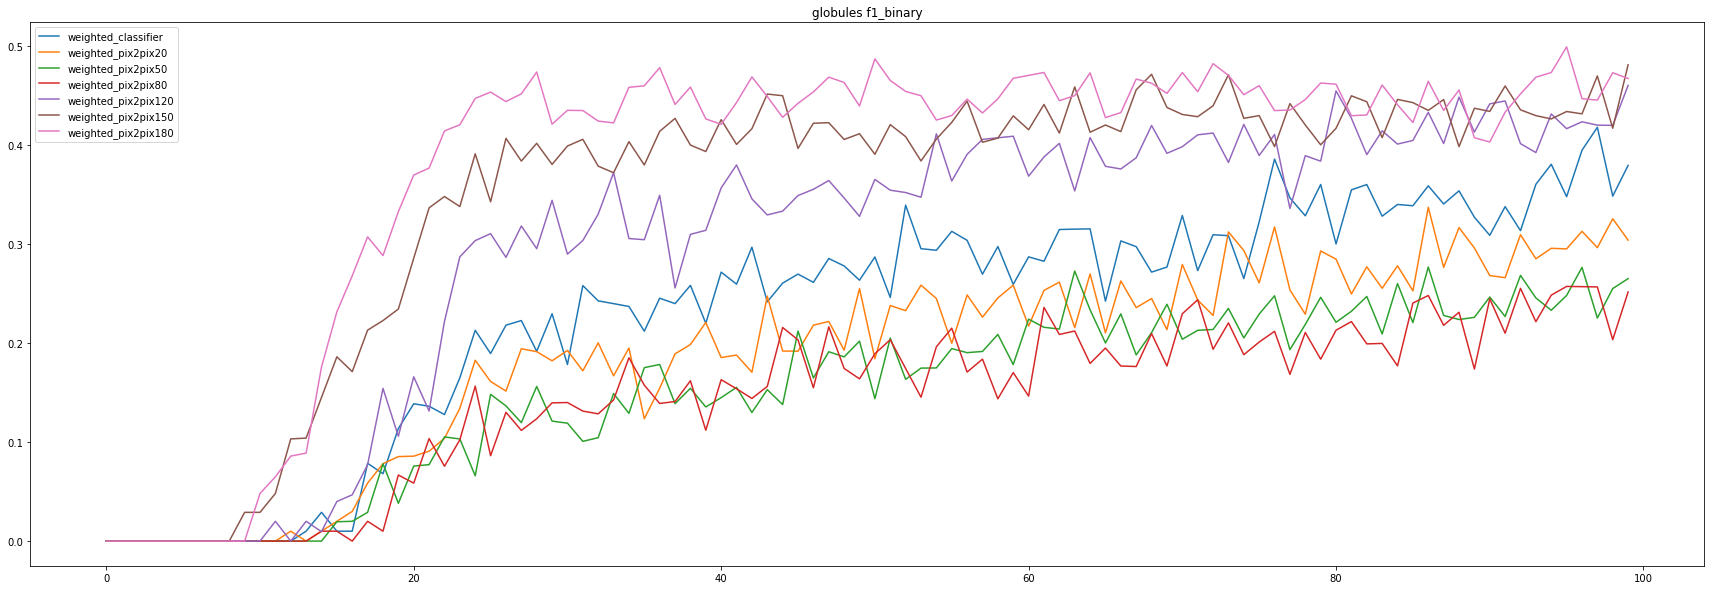

<Figure size 432x288 with 0 Axes>

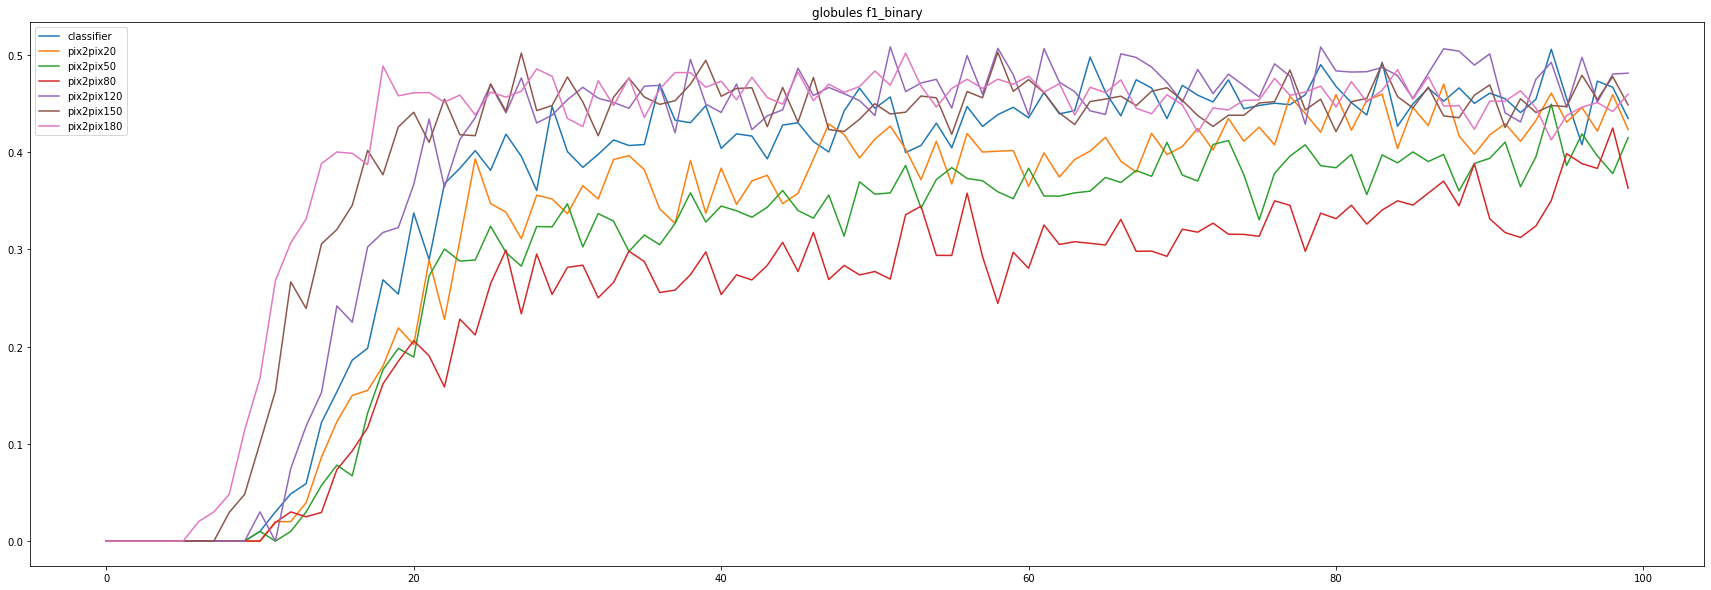

<Figure size 432x288 with 0 Axes>

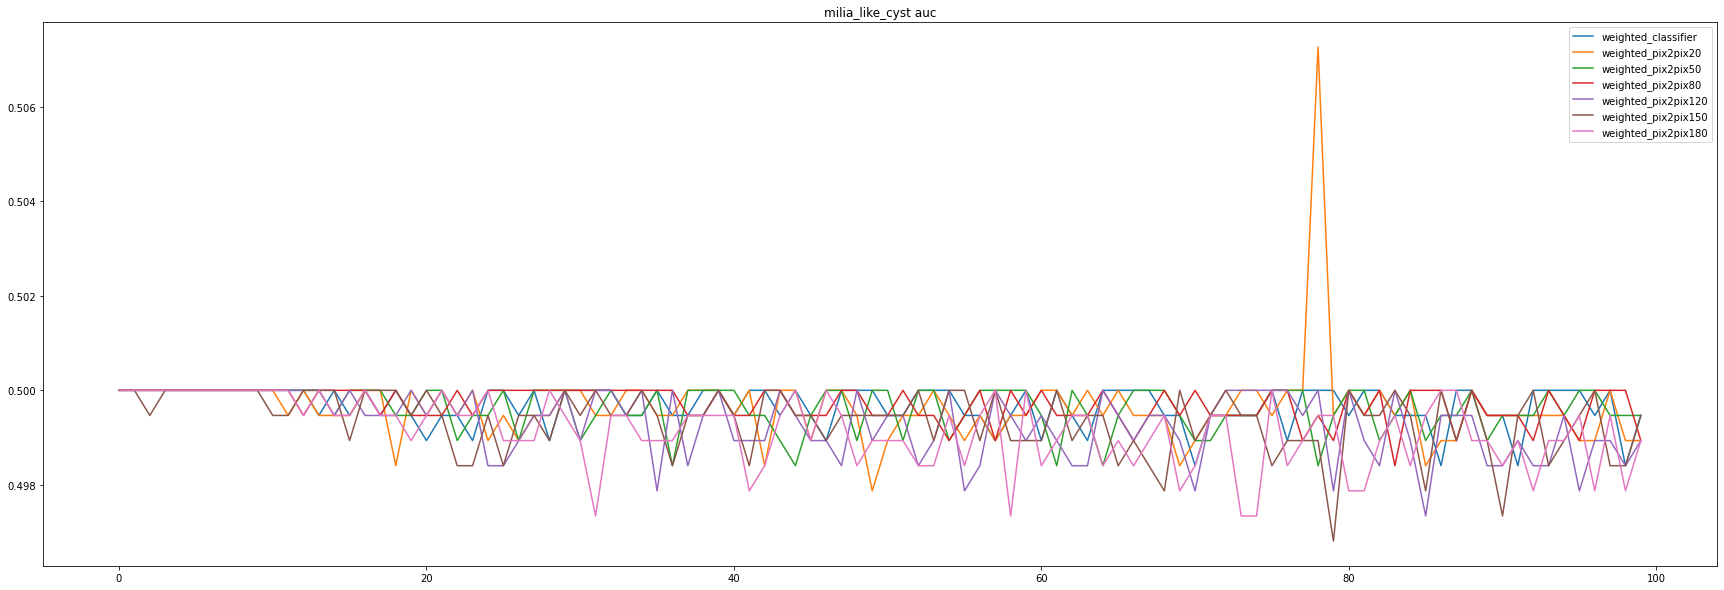

<Figure size 432x288 with 0 Axes>

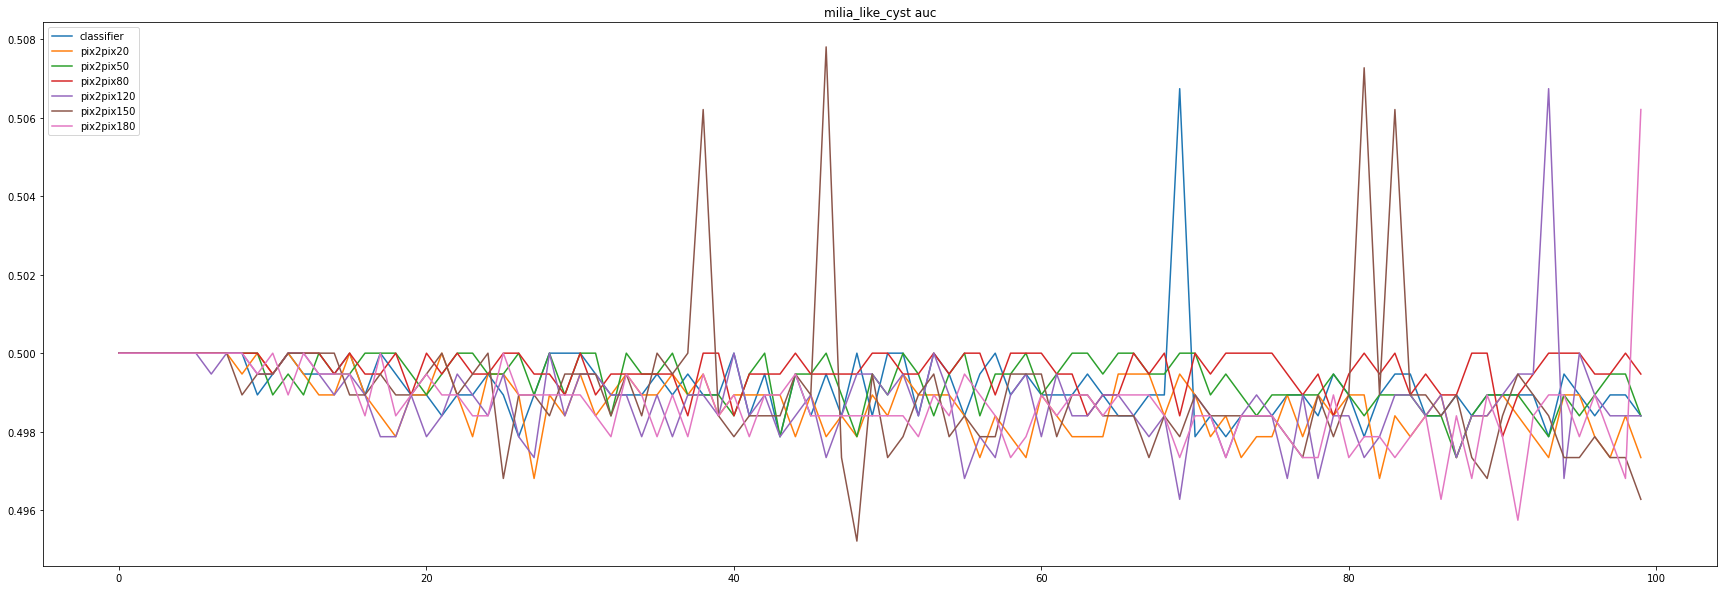

<Figure size 432x288 with 0 Axes>

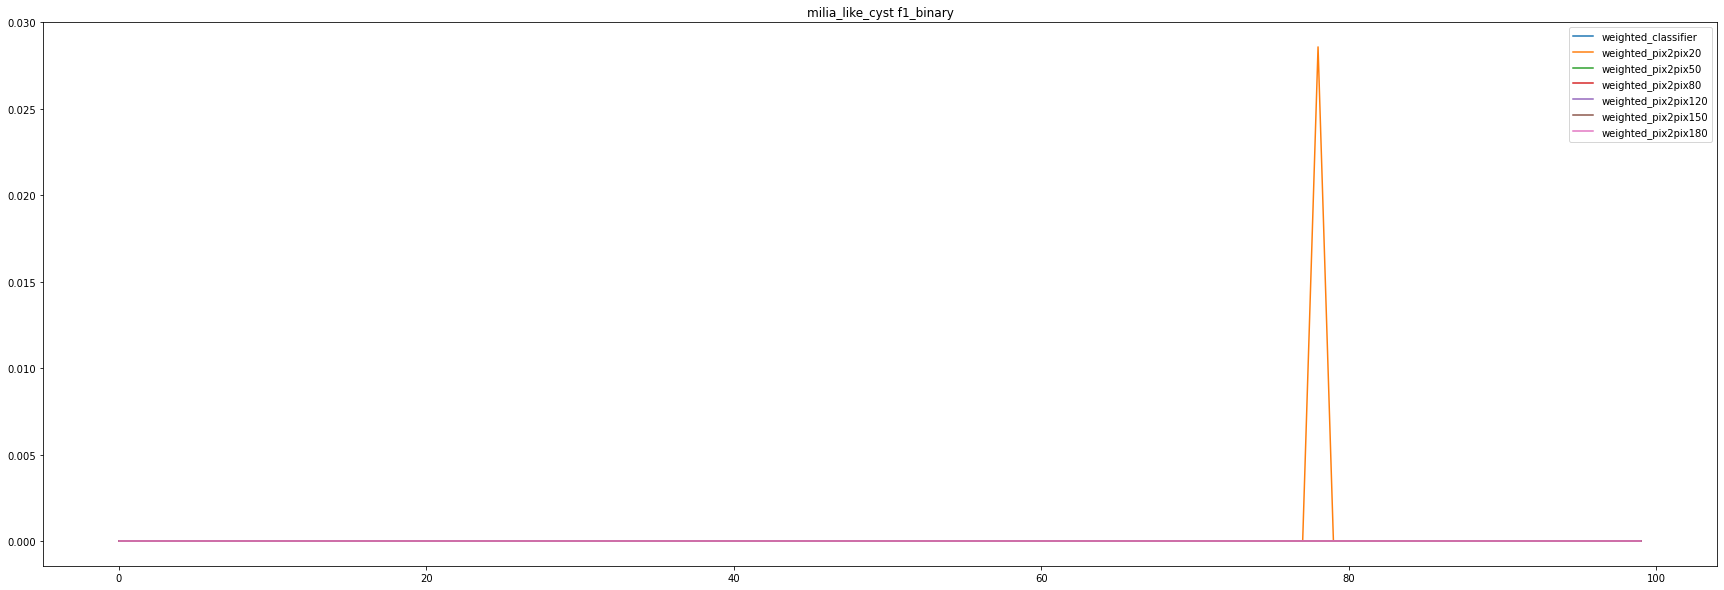

<Figure size 432x288 with 0 Axes>

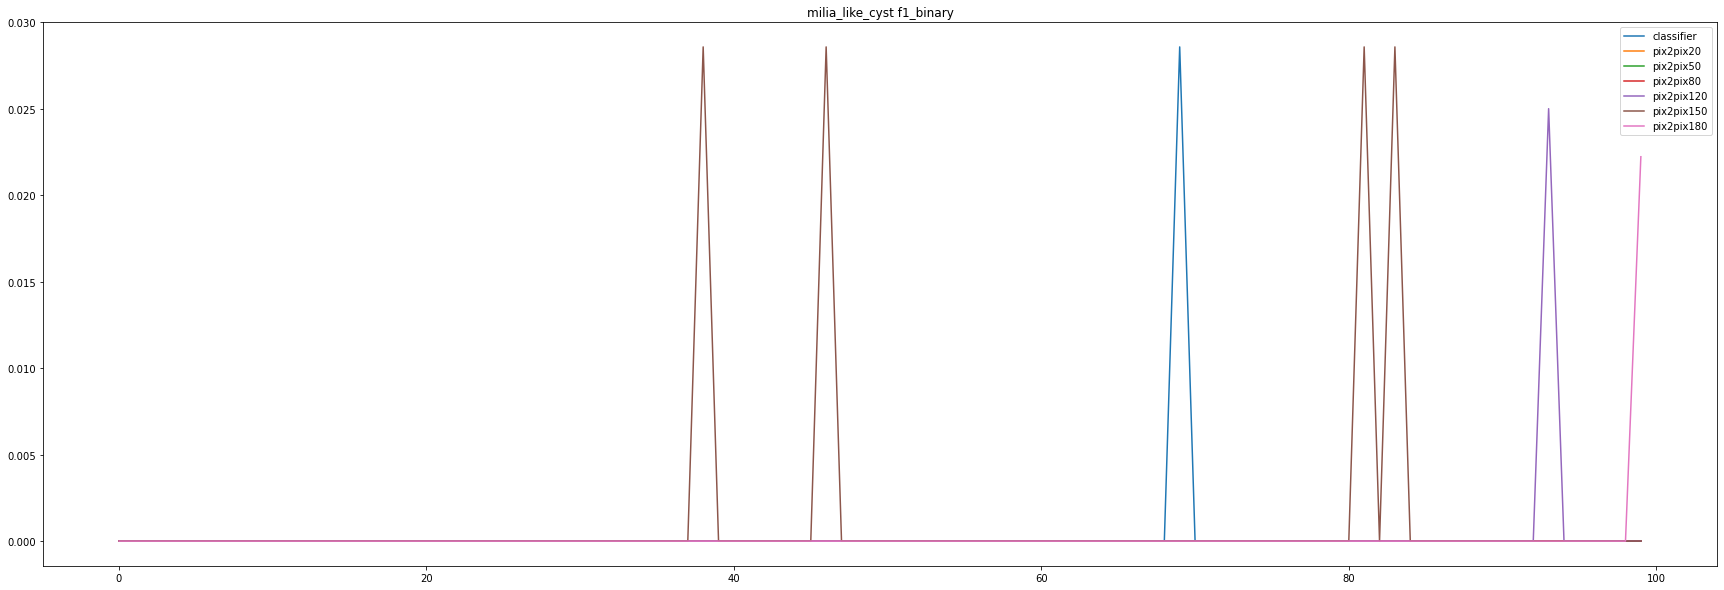

<Figure size 432x288 with 0 Axes>

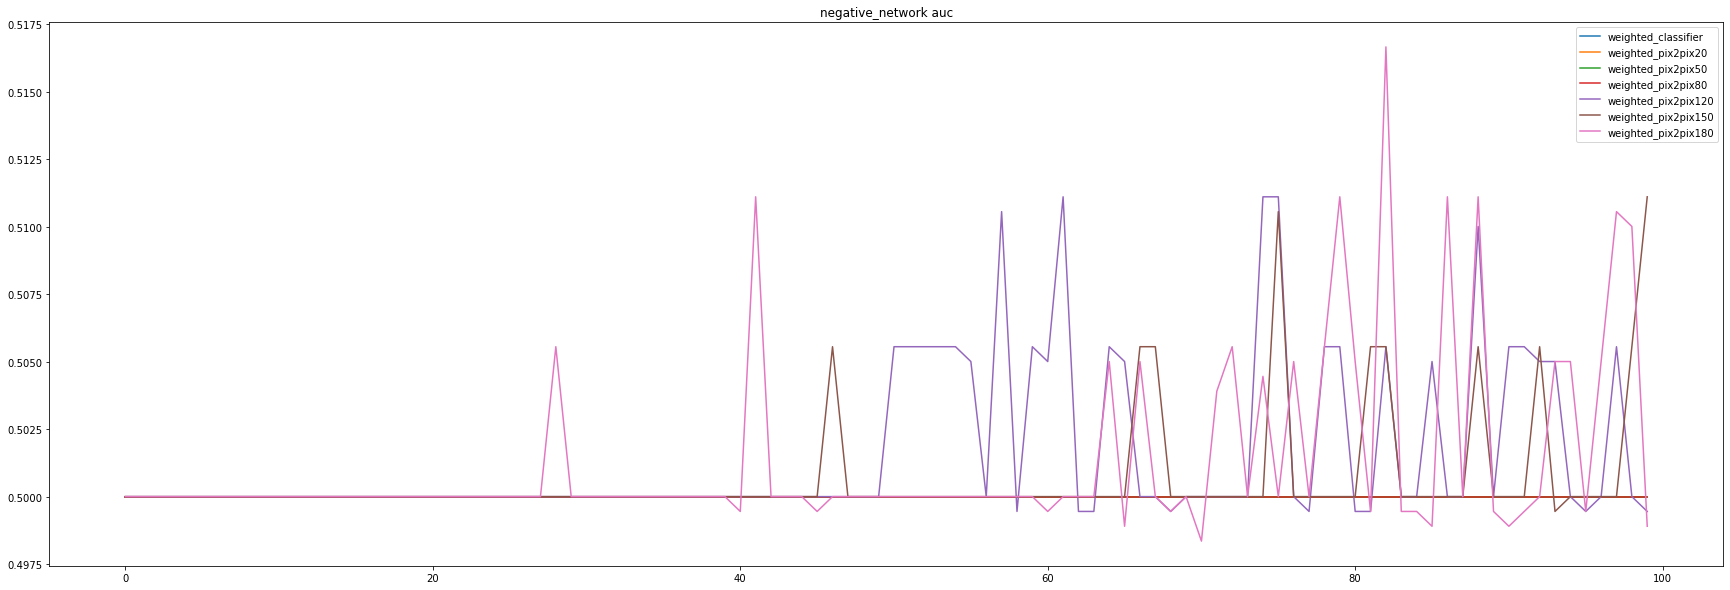

<Figure size 432x288 with 0 Axes>

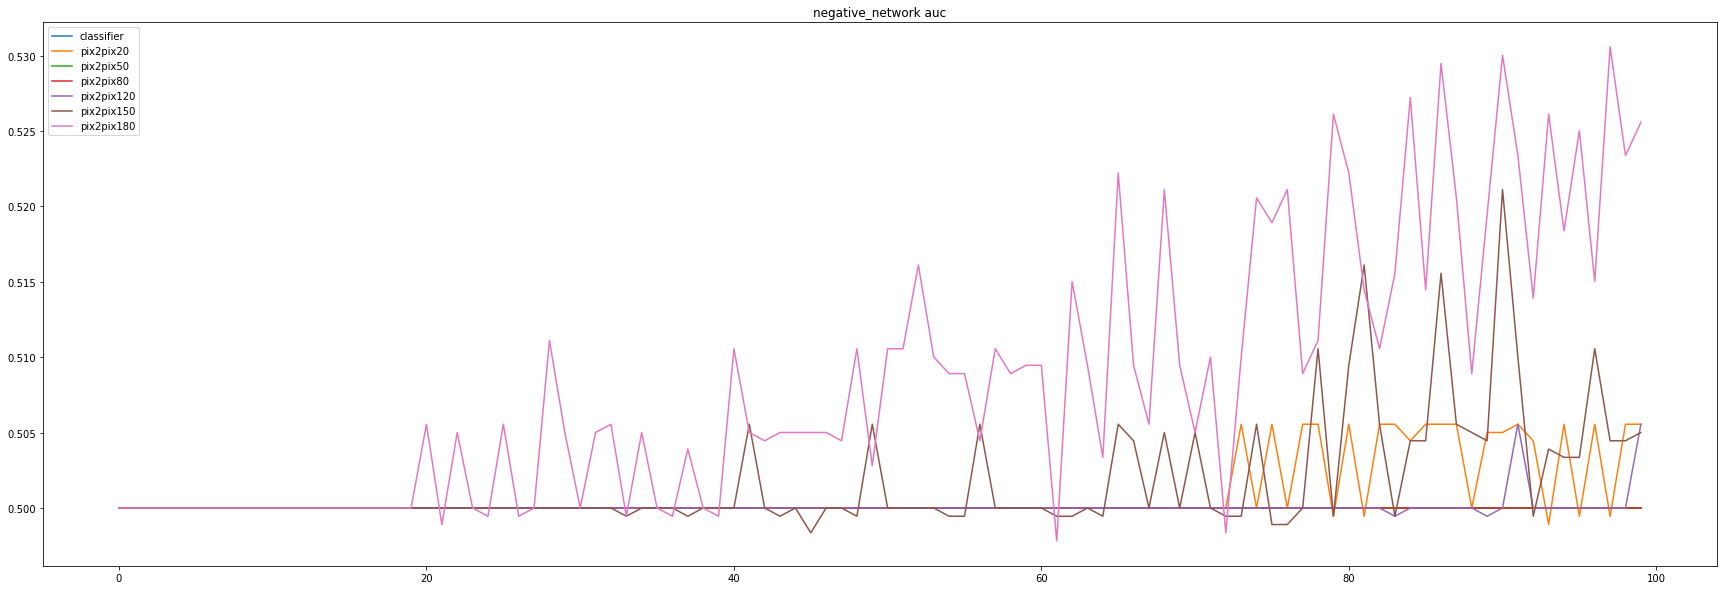

<Figure size 432x288 with 0 Axes>

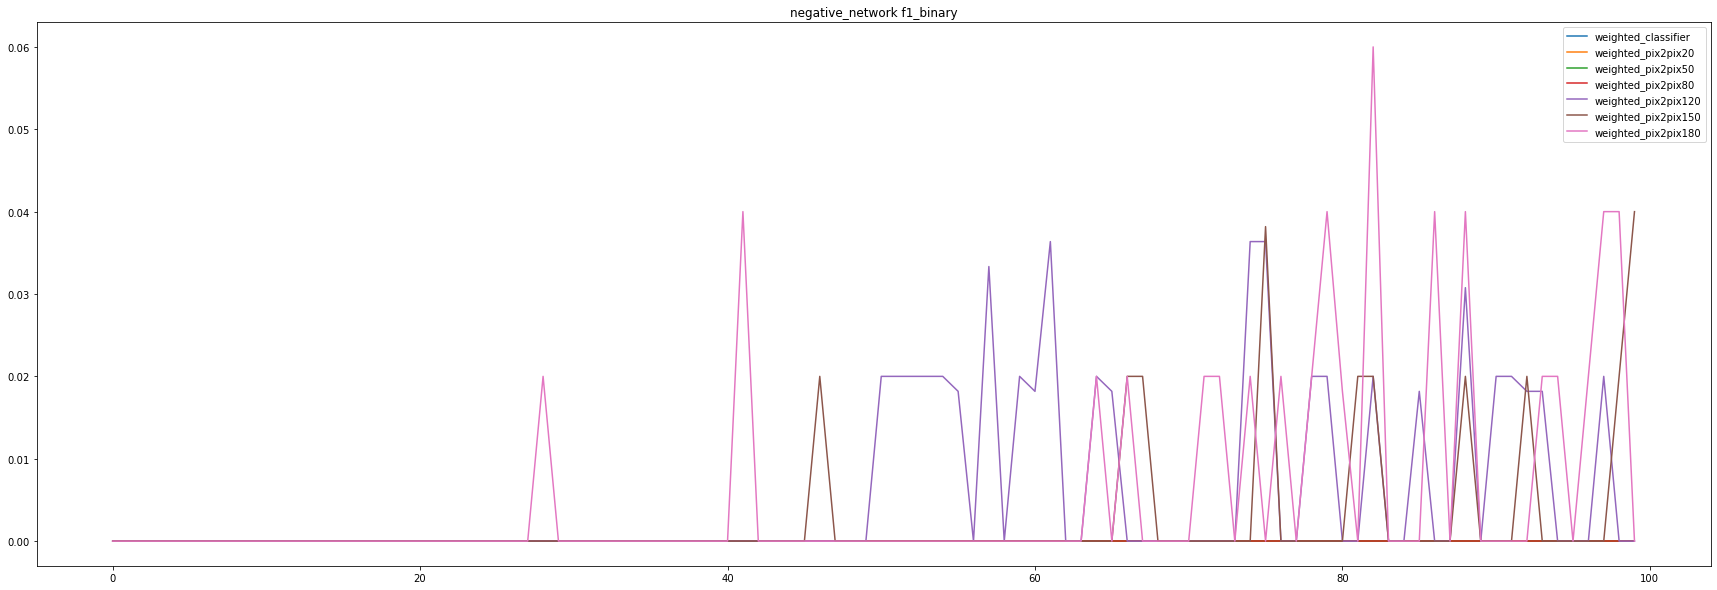

<Figure size 432x288 with 0 Axes>

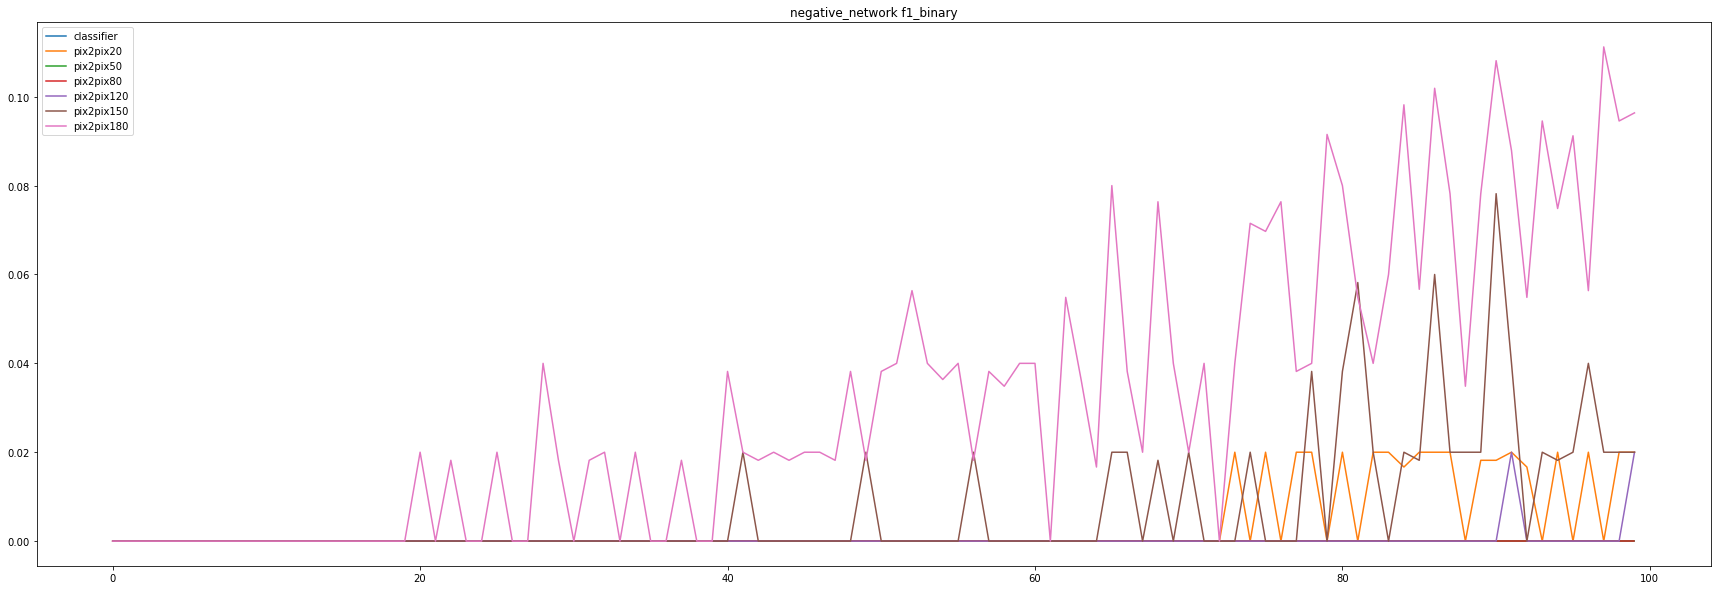

<Figure size 432x288 with 0 Axes>

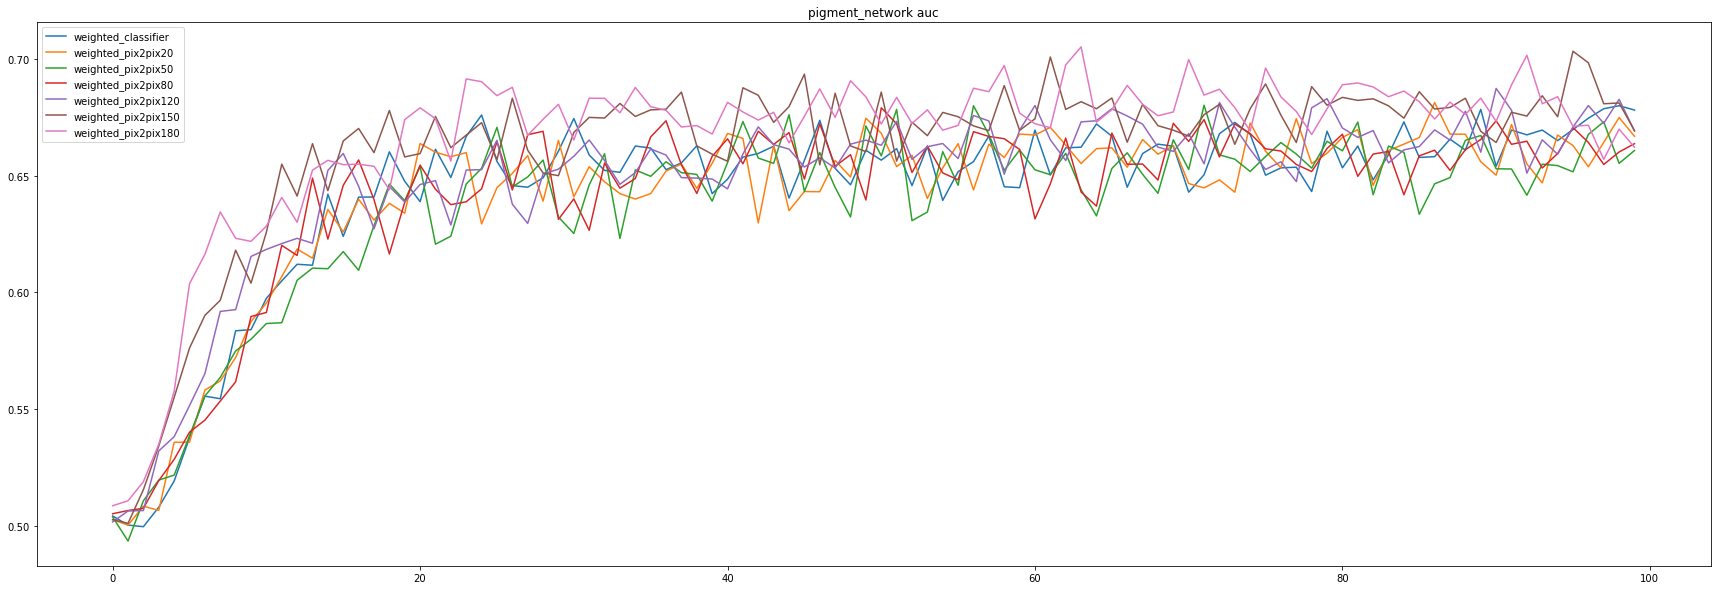

<Figure size 432x288 with 0 Axes>

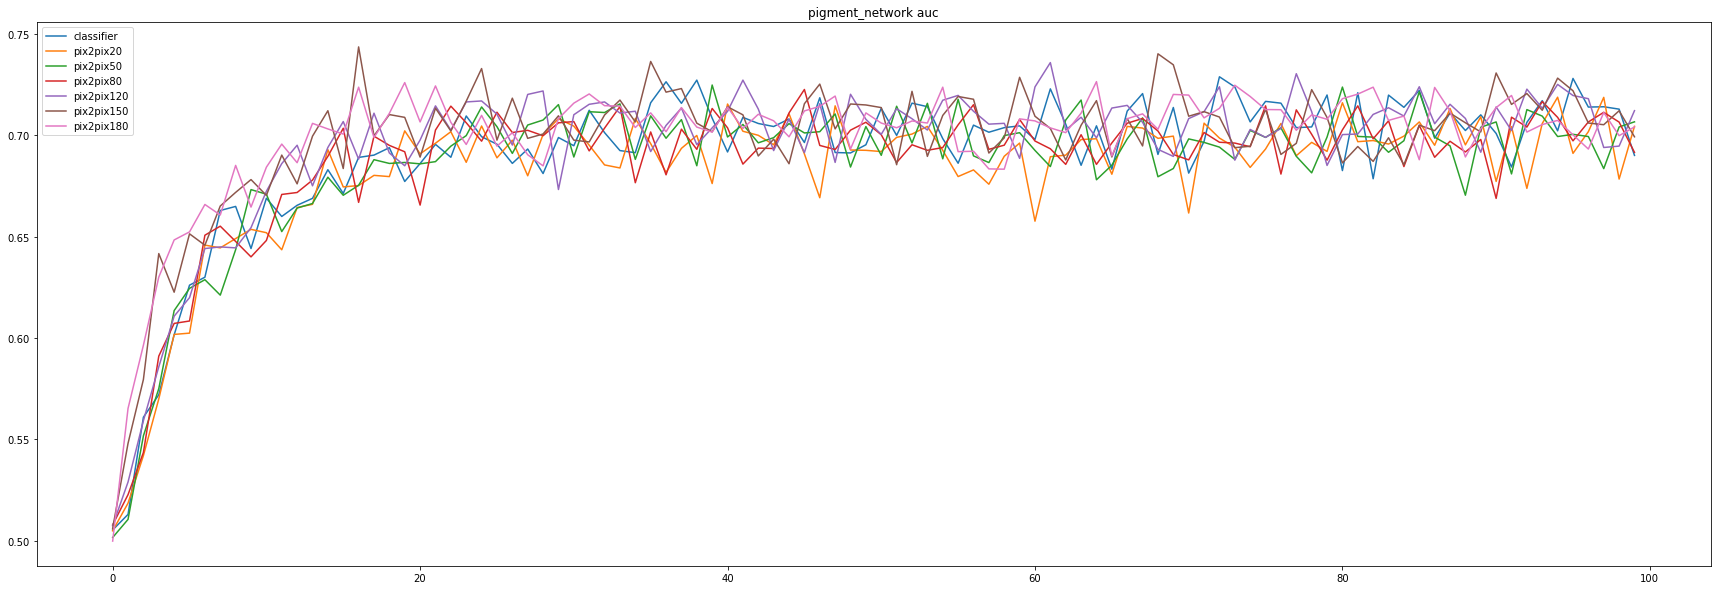

<Figure size 432x288 with 0 Axes>

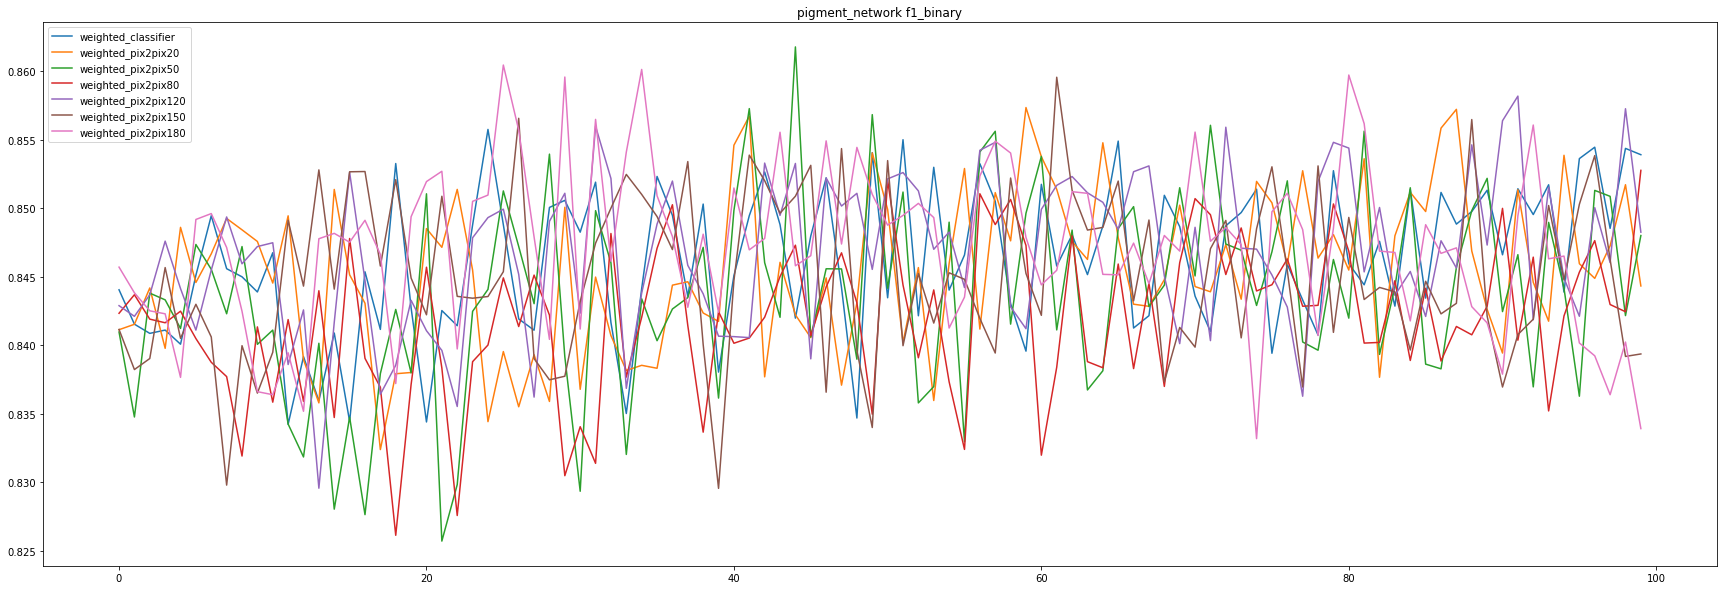

<Figure size 432x288 with 0 Axes>

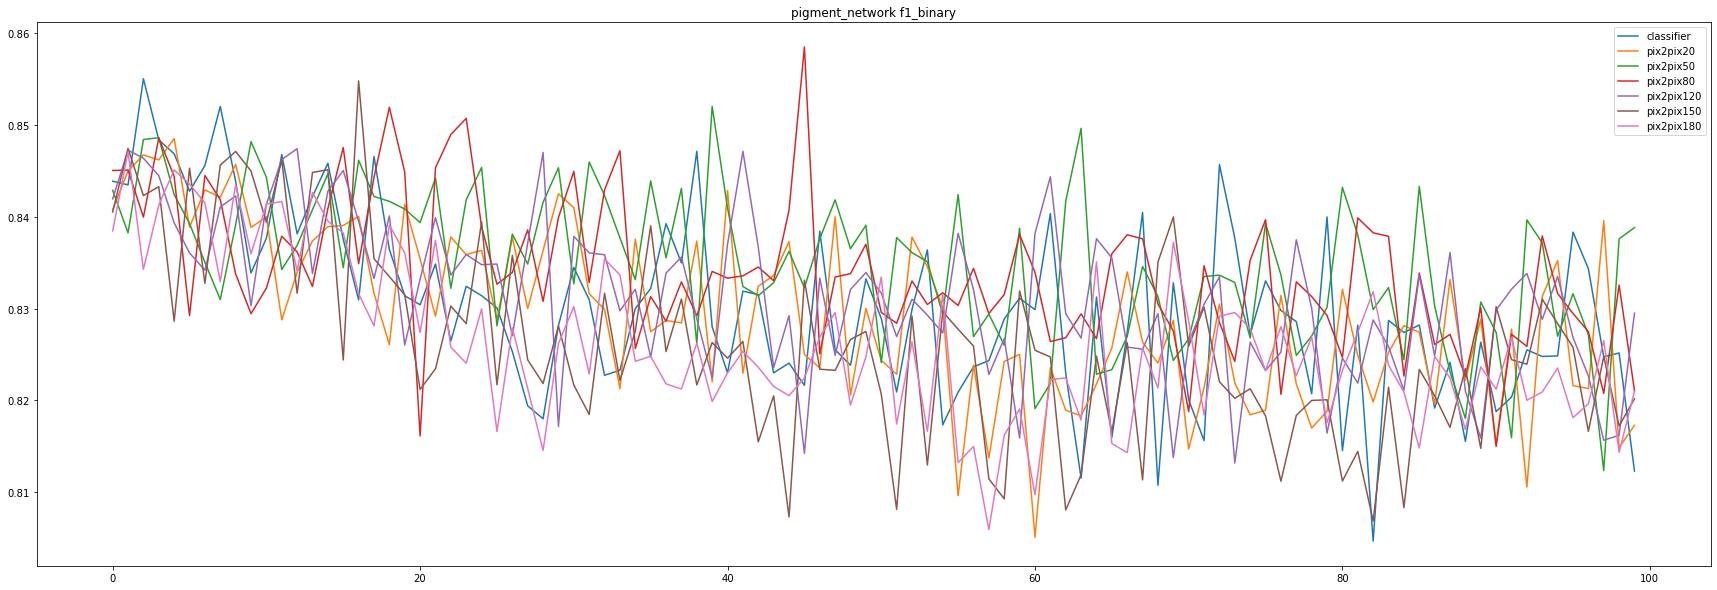

<Figure size 432x288 with 0 Axes>

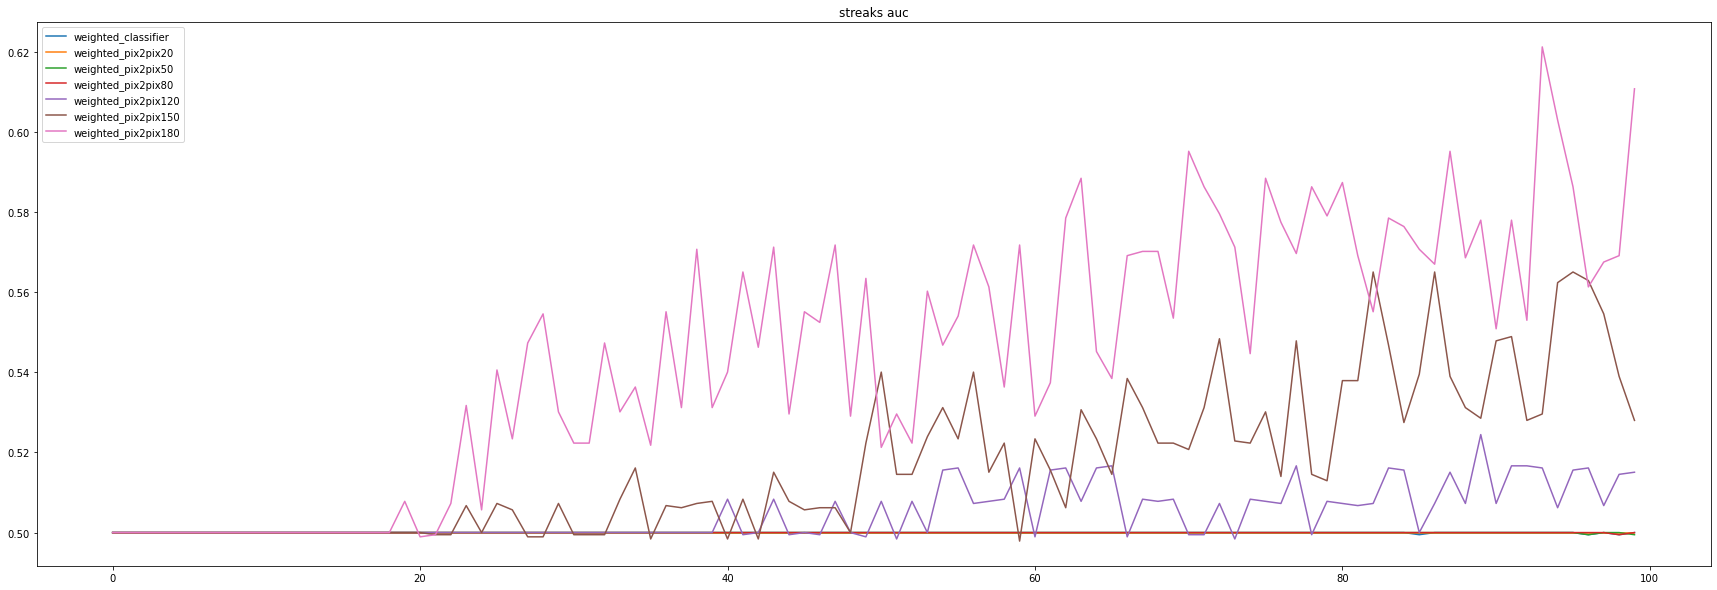

<Figure size 432x288 with 0 Axes>

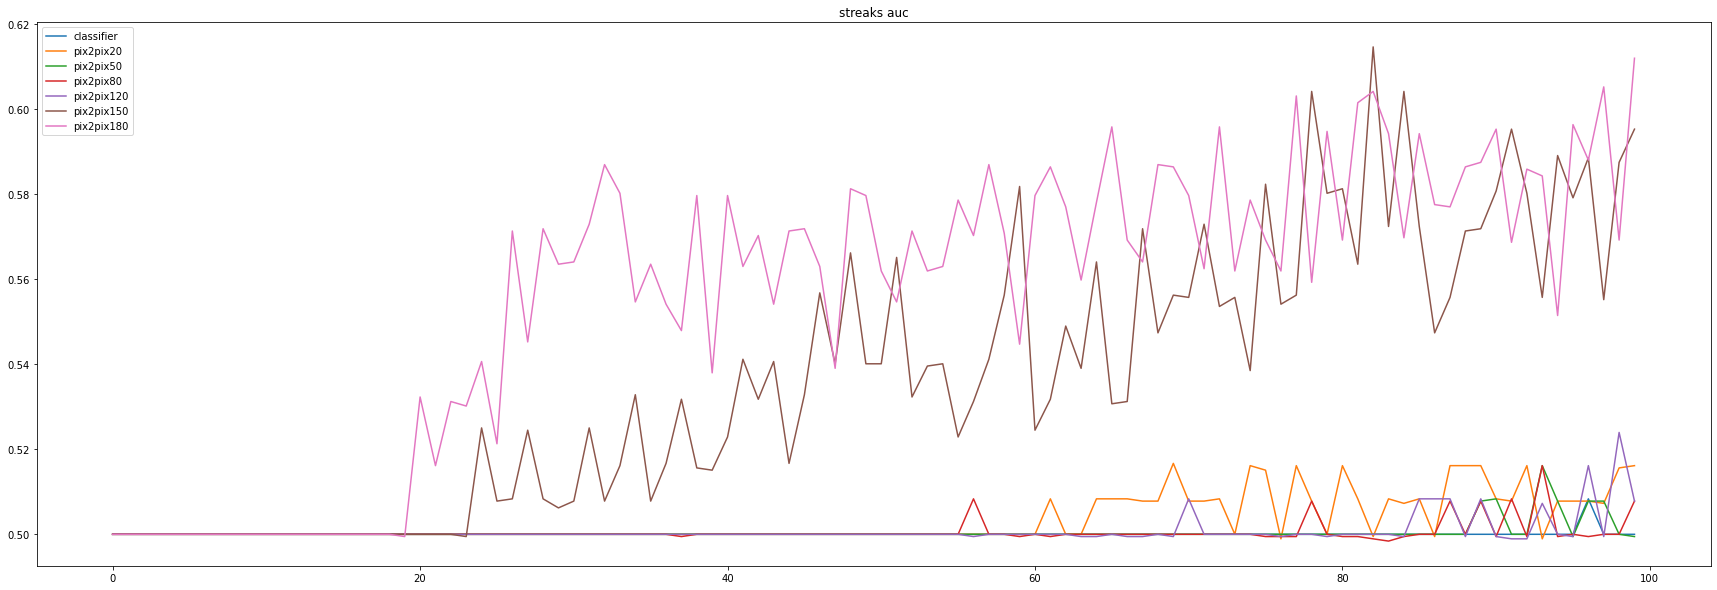

<Figure size 432x288 with 0 Axes>

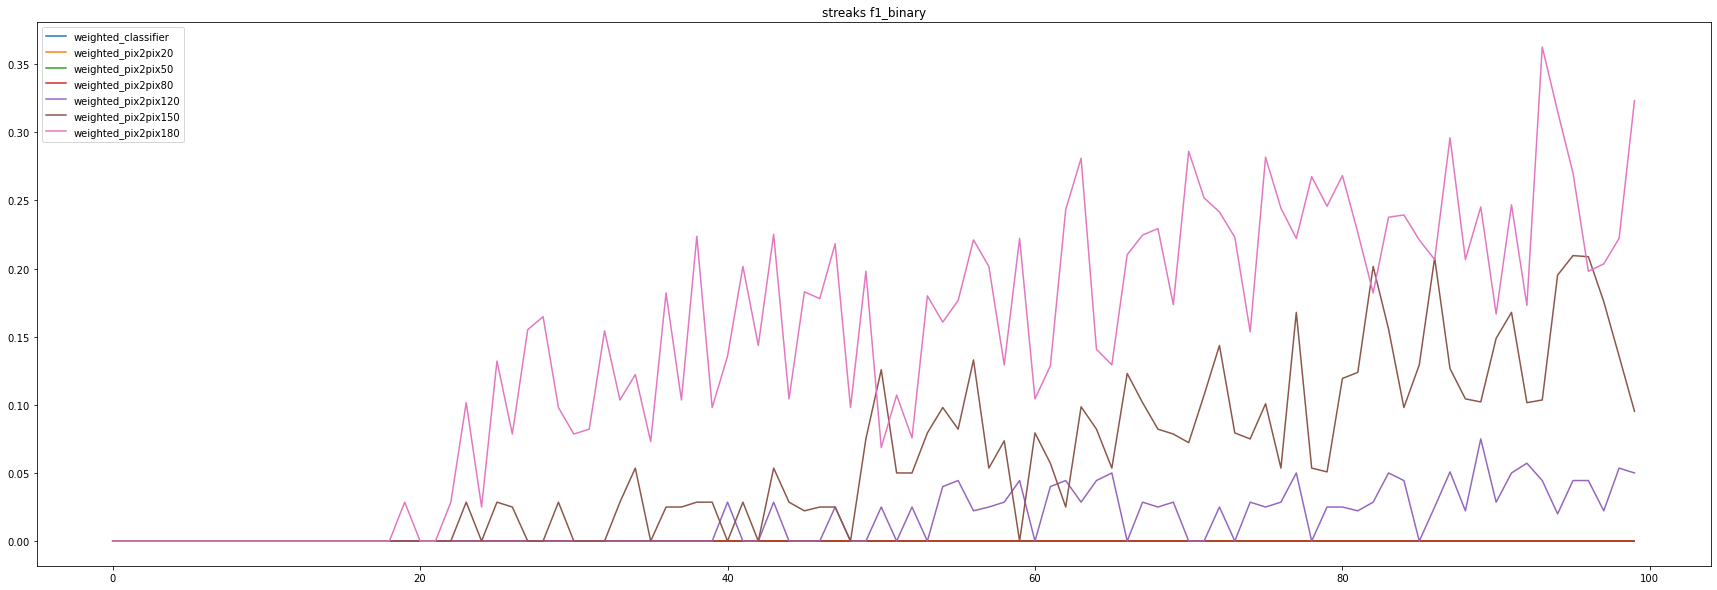

<Figure size 432x288 with 0 Axes>

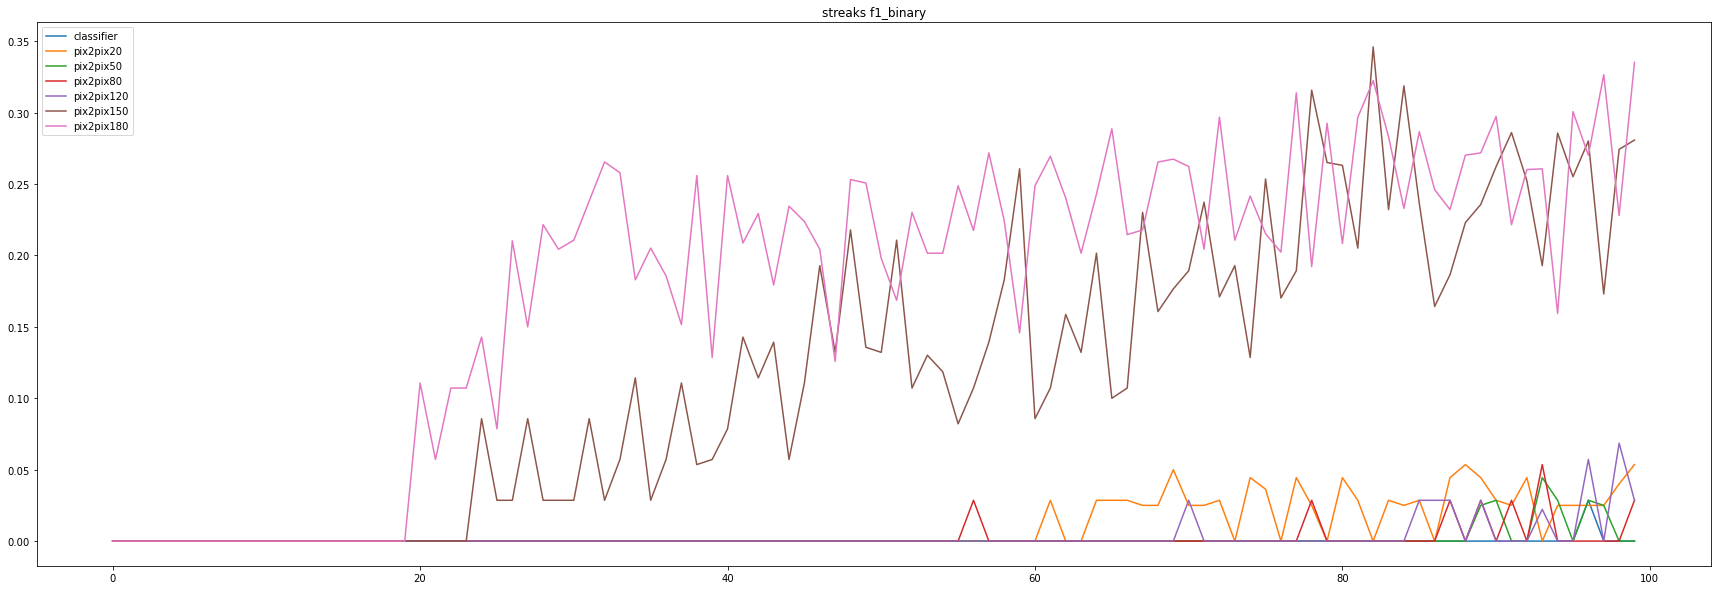

<Figure size 432x288 with 0 Axes>

In [16]:
draw_metric_by_deceases('globules', 'auc', weighted_data)
draw_metric_by_deceases('globules', 'auc', data)

draw_metric_by_deceases('globules', 'f1_binary', weighted_data)
draw_metric_by_deceases('globules', 'f1_binary', data)

draw_metric_by_deceases('milia_like_cyst', 'auc', weighted_data)
draw_metric_by_deceases('milia_like_cyst', 'auc', data)

draw_metric_by_deceases('milia_like_cyst', 'f1_binary', weighted_data)
draw_metric_by_deceases('milia_like_cyst', 'f1_binary', data)

draw_metric_by_deceases('negative_network', 'auc', weighted_data)
draw_metric_by_deceases('negative_network', 'auc', data)

draw_metric_by_deceases('negative_network', 'f1_binary', weighted_data)
draw_metric_by_deceases('negative_network', 'f1_binary', data)

draw_metric_by_deceases('pigment_network', 'auc', weighted_data)
draw_metric_by_deceases('pigment_network', 'auc', data)

draw_metric_by_deceases('pigment_network', 'f1_binary', weighted_data)
draw_metric_by_deceases('pigment_network', 'f1_binary', data)


draw_metric_by_deceases('streaks', 'auc', weighted_data)
draw_metric_by_deceases('streaks', 'auc', data)

draw_metric_by_deceases('streaks', 'f1_binary', weighted_data)
draw_metric_by_deceases('streaks', 'f1_binary', data)